In [4]:
using ModelingToolkit, Sophon, DomainSets
using Optimization, OptimizationOptimJL

@parameters t
@variables u(..)
Dₜ = Differential(t)
Dₜ² = Differential(t)^2

eq = Dₜ²(u(t))+Dₜ(u(t))~6u(t)
bcs = [
    u(0)~2,
    Dₜ(u(0))~-1
]

domain = [t∈0..2]
@named ode = PDESystem(eq, bcs, domain, [t], [u(t)])

PDESystem
Equations: Equation[Differential(t)(u(t)) + Differential(t)(Differential(t)(u(t))) ~ 6u(t)]
Boundary Conditions: Equation[u(0) ~ 2, Differential(t)(u(0)) ~ -1]
Domain: Symbolics.VarDomainPairing[Symbolics.VarDomainPairing(t, 0..2)]
Dependent Variables: Num[u(t)]
Independent Variables: Num[t]
Parameters: SciMLBase.NullParameters()
Default Parameter ValuesDict{Any, Any}()

In [6]:
sampler = QuasiRandomSampler(1000, 1)
pinn = PINN(Siren(1,16,16,16,16,1; omega=1.0f0))
strategy = NonAdaptiveTraining(1, 50)

prob = Sophon.discretize(ode, pinn, sampler, strategy)

OptimizationProblem. In-place: true
u0: ComponentVector{Float64}(layer_1 = (weight = [-0.8241336345672607; -0.619335412979126; … ; 0.5805238485336304; -0.25575506687164307;;], bias = [0.0; 0.0; … ; 0.0; 0.0;;]), layer_2 = (weight = [0.25665515661239624 0.3278225064277649 … -0.006959500722587109 0.30183443427085876; -0.2292017936706543 0.30782994627952576 … -0.04123315215110779 0.5480376482009888; … ; -0.09582050144672394 0.13058063387870789 … -0.5904499292373657 0.1005580872297287; 0.023114871233701706 0.4548139274120331 … -0.06429100781679153 -0.2131444662809372], bias = [0.0; 0.0; … ; 0.0; 0.0;;]), layer_3 = (weight = [0.027352111414074898 -0.5675317049026489 … 0.22408482432365417 -0.17273905873298645; -0.49999991059303284 -0.031044255942106247 … 0.2977629601955414 -0.09551630914211273; … ; -0.4565728008747101 -0.5259084701538086 … 0.10429059714078903 -0.49234458804130554; 0.07784325629472733 0.24327300488948822 … -0.3508818447589874 -0.3958447277545929], bias = [0.0; 0.0; … ; 0.0; 0

In [7]:
function callback(p, l)
    println("Loss: $l")
    return false
end

res = Optimization.solve(prob, BFGS(); maxiters=2000, callback=callback)

Loss: 274.9356664761556


Loss: 136.74736236060127


Loss: 40.02691774060246


Loss: 36.63321050704549
Loss: 35.92008800568417
Loss: 35.85143513652593


Loss: 35.751234917827034


Loss: 35.190345288369606


Loss: 35.04115542155697


Loss: 34.81114256736047
Loss: 34.55072265153837


Loss: 34.32358193477478


Loss: 34.2065465384599
Loss: 34.117948567613844


Loss: 33.96523920223961


Loss: 33.84767758389604
Loss: 33.78966721652485


Loss: 33.556690252469636


Loss: 33.411070300731666


Loss: 33.231070880746984


Loss: 33.078157082028625


Loss: 32.89564510499817


Loss: 32.30737428418995


Loss: 32.25036747279231


Loss: 32.05048842890855


Loss: 31.76783907784439


Loss: 31.619599073966935
Loss: 31.59174031152083


Loss: 31.466054141269222


Loss: 31.2182516313685


Loss: 31.10657233387434


Loss: 30.985010630002144


Loss: 30.878198543814246


Loss: 30.637418188258753


Loss: 30.551415882266785


Loss: 30.337400732495272


Loss: 30.107092620879058


Loss: 29.918325282297296


Loss: 29.75738106190981


Loss: 29.638018733335834


Loss: 29.516128265760397


Loss: 29.464885108025335
Loss: 29.377888720255243


Loss: 29.206703208364043


Loss: 29.02528752316463


Loss: 28.973730795193774


Loss: 28.818825298837613


Loss: 28.531984624485663


Loss: 28.438057518970908
Loss: 28.31307820796966


Loss: 28.26604518814387


Loss: 28.12915021162963


Loss: 27.945461520817503


Loss: 27.44852004239294


Loss: 27.391718470223335


Loss: 27.311090274509397


Loss: 27.221925503704895


Loss: 27.02165478372587


Loss: 26.732694088286966


Loss: 26.676296804509036


Loss: 26.536119169813997


Loss: 26.309864077500542


Loss: 26.12925718872211


Loss: 25.996181958154445


Loss: 25.76779313288351


Loss: 25.65616970339453


Loss: 25.510951466313355


Loss: 25.232605687642533


Loss: 25.074973258955385


Loss: 24.926089189773784


Loss: 24.518160225532426


Loss: 23.38832720346196


Loss: 23.06510109642538


Loss: 22.378119367205027


Loss: 22.15342077155918


Loss: 21.66403818464936


Loss: 21.445852190548226


Loss: 21.134966588180674


Loss: 21.00073737631404


Loss: 20.806800130394084


Loss: 20.60476757474543


Loss: 20.34780833644547


Loss: 20.08077333745025


Loss: 19.889708279241876


Loss: 19.65056728058765


Loss: 19.46968948999762


Loss: 19.27801680712873


Loss: 19.160491338050484


Loss: 18.908093944904703


Loss: 18.396094190938445


Loss: 18.286820359296325


Loss: 18.162635315590613


Loss: 18.082844824021386


Loss: 17.805258038308057


Loss: 17.44354090935304


Loss: 16.855327062682804


Loss: 16.51356362902951


Loss: 16.370166123445895


Loss: 16.10712372799191


Loss: 15.832766896766353


Loss: 15.098586048534965


Loss: 14.698620813382082


Loss: 14.660059886865541


Loss: 14.4243332297116


Loss: 14.13277132257918


Loss: 14.014499151097418


Loss: 13.944303592099253


Loss: 13.325702365063146


Loss: 12.577958628502698


Loss: 12.267310156333778


Loss: 11.870216185071861


Loss: 11.639712355528781


Loss: 11.497827947517305


Loss: 11.402818170046956


Loss: 11.24832175633932


Loss: 11.018067423011834


Loss: 10.491852640440873


Loss: 10.293321605067135


Loss: 10.242716429656024


Loss: 10.041517079348944


Loss: 9.738796421232564


Loss: 9.329743849464734


Loss: 9.270763135913578


Loss: 9.15356330984598


Loss: 8.910165648309269


Loss: 8.813726670013946


Loss: 8.689182180596791


Loss: 8.554927344910228


Loss: 8.430938185529453


Loss: 8.229912455473325


Loss: 8.008386077662335


Loss: 7.823751081391022


Loss: 7.623201728234534


Loss: 7.492900406615718


Loss: 7.181475751714721


Loss: 6.949195788284145


Loss: 6.801294494032431
Loss: 6.727620939067535


Loss: 6.633694041523093


Loss: 6.557351182437343


Loss: 6.331583077639686


Loss: 6.245528186994857


Loss: 6.147039920530897


Loss: 6.058289084170891


Loss: 5.959104315619132


Loss: 5.823433501021549


Loss: 5.673053015579261


Loss: 5.612630734416357
Loss: 5.5685001827358676


Loss: 5.470894274527636


Loss: 5.252093998417339


Loss: 5.082220433117815


Loss: 4.892936787497769


Loss: 4.599620692887964


Loss: 4.470709888463597


Loss: 4.386937465928483


Loss: 4.301647865491425


Loss: 4.236949744695595


Loss: 4.163246474104798


Loss: 4.0970847801487045


Loss: 4.033890378540029
Loss: 3.9464680570819914


Loss: 3.876574949784977


Loss: 3.7032193817769388


Loss: 3.58763860143687


Loss: 3.4585599418768145


Loss: 3.332744493433839


Loss: 3.2479070030931254
Loss: 3.1492577523517413


Loss: 3.1027269766132166
Loss: 3.0552021959184814


Loss: 2.940857390276195


Loss: 2.844619744910561


Loss: 2.7797711717952374
Loss: 2.521148755708309


Loss: 2.456929975776328


Loss: 2.3621584245504357


Loss: 2.2400168747143474


Loss: 2.181206263534539


Loss: 2.1128526607274773


Loss: 2.0807127712768736


Loss: 2.0333689260929453
Loss: 1.954899347068


Loss: 1.9006341503387063


Loss: 1.866496413262989


Loss: 1.7914502348804529


Loss: 1.754679168145305
Loss: 1.7045231934214762


Loss: 1.6431827566139452


Loss: 1.6069471849211403
Loss: 1.5625373449097975


Loss: 1.502151171277426


Loss: 1.4490443625728968
Loss: 1.399271616982826


Loss: 1.3394689710366467


Loss: 1.3114352760227947
Loss: 1.288358020330237


Loss: 1.2708057194605782


Loss: 1.2260950217737243
Loss: 1.1546814151609472


Loss: 1.1125390518855525


Loss: 1.090226506330912


Loss: 1.0374523398592377


Loss: 1.0226421557754113


Loss: 0.9973703868940804


Loss: 0.9685172373156762


Loss: 0.9087656293830766


Loss: 0.8644597648744917


Loss: 0.7981678929876961


Loss: 0.7397464810309001
Loss: 0.7165095662562533


Loss: 0.6991233535270235


Loss: 0.6312688114446966


Loss: 0.5837679145475207


Loss: 0.5282448783020793


Loss: 0.4867761328539027


Loss: 0.4612795184027167


Loss: 0.41993399233265843
Loss: 0.3913385904239283


Loss: 0.3564146647448206
Loss: 0.33206146274002263


Loss: 0.31490089932301374
Loss: 0.2731282458783641


Loss: 0.2567443685173149


Loss: 0.23218442433276362
Loss: 0.2103198450275781


Loss: 0.1929288476141438
Loss: 0.17957405918720376


Loss: 0.1699874990619421
Loss: 0.15287311420987462


Loss: 0.14009383701737868
Loss: 0.11979641119238273


Loss: 0.11035671902090789


Loss: 0.10312699374204379
Loss: 0.09337526811192581


Loss: 0.0862664321591834
Loss: 0.07962480733152216


Loss: 0.07514553696867236
Loss: 0.07035349400071352


Loss: 0.06390070859842172
Loss: 0.056044272693565246


Loss: 0.046672368234554354
Loss: 0.0391556647627628


Loss: 0.033846003669014066
Loss: 0.03241109403051556


Loss: 0.031043448426204805
Loss: 0.027613261973818855


Loss: 0.025299632899728204
Loss: 0.02190483636097482


Loss: 0.020469342221451362
Loss: 0.019835983277573146
Loss: 0.01933047761635049


Loss: 0.016887659377759538
Loss: 0.01485048285949231


Loss: 0.013820803564505347
Loss: 0.012540709200767374


Loss: 0.011703535869097424
Loss: 0.011214280468195937


Loss: 0.01046889233109978
Loss: 0.010145929102708881
Loss: 0.009860519460904209


Loss: 0.009375817713210373
Loss: 0.008585450602547024


Loss: 0.007959060604238502
Loss: 0.0075591571960428655


Loss: 0.007080442460435839
Loss: 0.0069658000834134665
Loss: 0.006368601283160767


Loss: 0.005835673708235028
Loss: 0.005597072790390481
Loss: 0.0053298105015637575


Loss: 0.005239722635677872
Loss: 0.004694365069161706


Loss: 0.00427478550865309
Loss: 0.004003704893112245
Loss: 0.003922637286130699


Loss: 0.0038482490796901965
Loss: 0.0033200981467469905
Loss: 0.003283924948378968


Loss: 0.003201121211296769
Loss: 0.002922152318874702


Loss: 0.002571321118405398
Loss: 0.002318033731205657
Loss: 0.002206239135848064


Loss: 0.002103093335341381
Loss: 0.0017730874368132165


Loss: 0.0016637491791159438
Loss: 0.001632056921009327
Loss: 0.0014180358730140662


Loss: 0.0013662091925833804
Loss: 0.001265994223683278
Loss: 0.0011982373487801322


Loss: 0.0010811309304371885
Loss: 0.0009896321752625927


Loss: 0.0008878333202798827
Loss: 0.0008250064712115925
Loss: 0.0007869101658545864


Loss: 0.0007305245415460405
Loss: 0.0006430038956894479


Loss: 0.0005740402710107629
Loss: 0.0005459030187296734
Loss: 0.00044508087645735183


Loss: 0.0003953580596742557
Loss: 0.0003406735790353346
Loss: 0.0003136456433041038


Loss: 0.0002802730249455347
Loss: 0.00024228910726886284
Loss: 0.00020439081711577485


Loss: 0.00016930100486145757
Loss: 0.00015145328632367014


Loss: 0.00010794726716068278
Loss: 9.020007200729048e-5
Loss: 7.289678246108863e-5


Loss: 5.760816343713455e-5
Loss: 4.8256670254900084e-5
Loss: 4.52012768858498e-5


Loss: 4.314377940973971e-5
Loss: 4.177261183366137e-5
Loss: 4.123016326311303e-5


Loss: 4.088654159135414e-5
Loss: 4.067638304688413e-5


Loss: 4.0103117296630266e-5
Loss: 3.879536138309437e-5


Loss: 3.771919987135551e-5
Loss: 3.573045542678192e-5
Loss: 3.380487721411703e-5


Loss: 3.307823978078704e-5
Loss: 3.216323158802103e-5
Loss: 3.14463501717462e-5


Loss: 3.0233142284436315e-5
Loss: 2.890614860909075e-5


Loss: 2.7084550951689622e-5
Loss: 2.5881837825621253e-5
Loss: 2.5236035995091324e-5


Loss: 2.4574394394325496e-5
Loss: 2.3655473632329347e-5
Loss: 2.315577925990213e-5


Loss: 2.2730456354600536e-5
Loss: 2.1487711141215867e-5
Loss: 2.1232021941610085e-5


Loss: 2.0050829130272577e-5
Loss: 1.9596675570937998e-5
Loss: 1.9411923811424742e-5


Loss: 1.8668203143982445e-5
Loss: 1.8471196179882696e-5
Loss: 1.8270291837024354e-5


Loss: 1.8007078624412095e-5
Loss: 1.7810554312558633e-5
Loss: 1.774028533906594e-5


Loss: 1.743798137198904e-5
Loss: 1.7309879147542383e-5
Loss: 1.70407515441034e-5


Loss: 1.688081972199814e-5
Loss: 1.6432433127270694e-5
Loss: 1.6159396011731964e-5


Loss: 1.587437176028841e-5
Loss: 1.5280457175779157e-5
Loss: 1.5166758544955027e-5


Loss: 1.4884893574765087e-5
Loss: 1.4648317847456821e-5
Loss: 1.4436778871854574e-5


Loss: 1.413863962860151e-5
Loss: 1.3989261019521597e-5
Loss: 1.3800197523649922e-5


Loss: 1.35984194211656e-5
Loss: 1.3192858421274112e-5
Loss: 1.266993852695336e-5


Loss: 1.2235292651316779e-5
Loss: 1.1448525597243692e-5


Loss: 9.905428004753827e-6
Loss: 8.432677947605157e-6


Loss: 7.671830637617443e-6
Loss: 7.2298442041397745e-6


Loss: 6.842586969054411e-6
Loss: 5.429779735637461e-6
Loss: 4.39970557982814e-6


Loss: 3.57772532160858e-6
Loss: 2.844752318845321e-6
Loss: 2.3748803011921934e-6


Loss: 2.1072783980107018e-6
Loss: 1.9456350303749424e-6
Loss: 1.7529480549529112e-6


Loss: 1.6739332541147646e-6
Loss: 1.5752863622643806e-6
Loss: 1.5057900464816671e-6


Loss: 1.4230174233271658e-6
Loss: 1.3026599378692238e-6
Loss: 1.2529910616429194e-6


Loss: 1.2226328266278422e-6
Loss: 1.202864580223791e-6
Loss: 1.198469265420161e-6


Loss: 1.196544505709643e-6
Loss: 1.191592002093038e-6


Loss: 1.1810013094601805e-6
Loss: 1.1606523761472702e-6


Loss: 1.1410529320056223e-6
Loss: 1.1324446116305382e-6


Loss: 1.125676563921758e-6
Loss: 1.1229954145371158e-6


Loss: 1.1207337816341132e-6
Loss: 1.1165452226771465e-6


Loss: 1.1063816729372067e-6
Loss: 1.0990366233749454e-6
Loss: 1.0801916775616869e-6


Loss: 1.0496562722658456e-6
Loss: 9.979596986701828e-7
Loss: 9.449385214200779e-7


Loss: 8.97158598599062e-7
Loss: 8.605874848448351e-7
Loss: 8.456543047093939e-7


Loss: 8.310698492413178e-7
Loss: 8.129395903644849e-7


Loss: 7.994500029253743e-7
Loss: 7.844271178020271e-7
Loss: 7.725774280447342e-7


Loss: 7.626824409961358e-7
Loss: 7.525394687211761e-7
Loss: 7.505955879324096e-7


Loss: 7.477664622303736e-7
Loss: 7.474720703286046e-7
Loss: 7.47105665230158e-7


Loss: 7.469280949084758e-7
Loss: 7.457066115526041e-7


Loss: 7.432236548124842e-7
Loss: 7.327456385119364e-7
Loss: 7.226293512363616e-7


Loss: 7.003868174929065e-7
Loss: 6.646726119491144e-7
Loss: 6.404617983758577e-7


Loss: 6.358365442662037e-7
Loss: 6.139168366590197e-7
Loss: 6.043127538022475e-7


Loss: 5.809423587225888e-7
Loss: 5.7038175101495e-7
Loss: 5.474412318969274e-7


Loss: 5.406989416252301e-7
Loss: 5.231431955360138e-7
Loss: 5.12394635578375e-7


Loss: 4.991335260636551e-7
Loss: 4.84853124166652e-7
Loss: 4.7034827720182103e-7


Loss: 4.478426514997827e-7
Loss: 4.4541175876653526e-7
Loss: 4.3369363753478645e-7


Loss: 4.296849958472279e-7
Loss: 4.250788490787372e-7
Loss: 4.17463491043627e-7


Loss: 4.1519906429550476e-7
Loss: 4.057245836185987e-7
Loss: 3.9783322920268897e-7


Loss: 3.849598295128824e-7
Loss: 3.6775965794148583e-7
Loss: 3.5372891248744015e-7


Loss: 3.4515580962802754e-7
Loss: 3.3676008191238073e-7
Loss: 3.3049396886610705e-7


Loss: 3.263112944022378e-7
Loss: 3.2186172848389904e-7
Loss: 3.157998244369729e-7


Loss: 3.0840316733142433e-7
Loss: 3.048536947396017e-7
Loss: 2.941679281984986e-7


Loss: 2.8627773654301836e-7
Loss: 2.7900076678509914e-7
Loss: 2.7197905720795135e-7


Loss: 2.6863446122586094e-7
Loss: 2.6413648671620415e-7
Loss: 2.595050707800055e-7


Loss: 2.5272279915007184e-7
Loss: 2.468425165667356e-7
Loss: 2.414391164153046e-7


Loss: 2.38982195482286e-7
Loss: 2.3218434567997326e-7
Loss: 2.2940673462005588e-7


Loss: 2.2314998251556103e-7
Loss: 2.19411855870501e-7
Loss: 2.1510348410499087e-7


Loss: 2.106850303511992e-7
Loss: 2.0608449941006855e-7
Loss: 2.0166895645573377e-7


Loss: 1.9804190722118648e-7
Loss: 1.962437693418339e-7
Loss: 1.9286784908433532e-7


Loss: 1.913178054844017e-7
Loss: 1.8862018723264805e-7
Loss: 1.8691297411552043e-7


Loss: 1.838556494130016e-7
Loss: 1.8188141478622194e-7
Loss: 1.795011204579088e-7


Loss: 1.7879975999021885e-7
Loss: 1.7619911584670758e-7
Loss: 1.7466127398606964e-7


Loss: 1.7087119613530636e-7
Loss: 1.6850607079098142e-7
Loss: 1.6437666632858456e-7


Loss: 1.6126553578019582e-7
Loss: 1.585992854438627e-7
Loss: 1.5611988833427302e-7


Loss: 1.5421527293425136e-7
Loss: 1.4795209310304213e-7
Loss: 1.462773545821035e-7


Loss: 1.4024173938277781e-7
Loss: 1.3671702317291145e-7
Loss: 1.3416895900467393e-7


Loss: 1.308222549302014e-7
Loss: 1.29120912432708e-7
Loss: 1.2793234309468305e-7


Loss: 1.268813573752092e-7
Loss: 1.2568380699340166e-7
Loss: 1.2433218723999852e-7


Loss: 1.2283342110403213e-7
Loss: 1.2206146878986436e-7
Loss: 1.2113121802499115e-7


Loss: 1.1998827306881014e-7
Loss: 1.181551741796843e-7
Loss: 1.1752842719639187e-7


Loss: 1.1348400452955278e-7
Loss: 1.0837663265109248e-7
Loss: 1.0597298823177547e-7


Loss: 9.878823113481954e-8
Loss: 9.586802562509114e-8
Loss: 9.469737159620804e-8


Loss: 9.344869559882536e-8
Loss: 9.207580610479221e-8
Loss: 9.125501258689172e-8


Loss: 9.042395677578307e-8
Loss: 8.998645506326458e-8


Loss: 8.929750145328056e-8
Loss: 8.661980663007337e-8


Loss: 8.228431168465792e-8
Loss: 7.929591161546146e-8
Loss: 7.863974599400043e-8


Loss: 7.710192863643491e-8
Loss: 7.620609524581201e-8
Loss: 7.484197098651658e-8


Loss: 7.350390936396305e-8
Loss: 7.249507458734174e-8


Loss: 7.111846212648658e-8
Loss: 6.917127409332334e-8
Loss: 6.5464087316522e-8


Loss: 6.334974897826602e-8
Loss: 6.255578010735612e-8
Loss: 6.136590994047616e-8


Loss: 5.987688012061559e-8
Loss: 5.799202485020723e-8
Loss: 5.6369057655926646e-8


Loss: 5.4807155961830954e-8
Loss: 5.305853945244936e-8
Loss: 5.175732838759722e-8


Loss: 5.004318804561737e-8
Loss: 4.792321949342964e-8
Loss: 4.6429135935831625e-8


Loss: 4.5552663549475805e-8
Loss: 4.405441932939403e-8
Loss: 4.318093684501035e-8


Loss: 4.1328833262592187e-8
Loss: 3.987836026997466e-8
Loss: 3.884234756791617e-8


Loss: 3.758307005128051e-8
Loss: 3.5384009950377115e-8


Loss: 3.4585500250815583e-8
Loss: 3.3200375399642774e-8
Loss: 3.203565404305493e-8


Loss: 3.132845135333401e-8
Loss: 3.074057936187256e-8
Loss: 2.9318629971624552e-8


Loss: 2.841742355975064e-8
Loss: 2.7843447091126117e-8
Loss: 2.6933988416595908e-8


Loss: 2.5925515550951983e-8
Loss: 2.5327295464565765e-8
Loss: 2.5130572317694518e-8


Loss: 2.44849840319673e-8
Loss: 2.3937254908052787e-8
Loss: 2.2911409295508567e-8


Loss: 2.2106782166580653e-8
Loss: 2.1624282894901406e-8
Loss: 2.1168937054723185e-8


Loss: 2.0134162306105437e-8
Loss: 1.958796397741351e-8
Loss: 1.9094857060615842e-8


Loss: 1.8826402135059174e-8
Loss: 1.824589396817444e-8
Loss: 1.782249765973717e-8


Loss: 1.7299809092291586e-8
Loss: 1.7150745209220318e-8
Loss: 1.6758237462955002e-8


Loss: 1.6591305267051377e-8
Loss: 1.6432029464337794e-8


Loss: 1.620196049635157e-8
Loss: 1.6021873254517835e-8


Loss: 1.578647518451407e-8
Loss: 1.5492181155311437e-8
Loss: 1.5473028720056625e-8


Loss: 1.5299262984137437e-8
Loss: 1.5086969470659354e-8
Loss: 1.5030070779974532e-8


Loss: 1.497116268189523e-8
Loss: 1.4952501600041496e-8
Loss: 1.4900458557478516e-8


Loss: 1.4887747936123164e-8


Loss: 1.4883197899937492e-8


Loss: 1.4878748634472427e-8


Loss: 1.4868481124809037e-8


Loss: 1.484598376377356e-8


Loss: 1.4823262927045106e-8


Loss: 1.4819718295448436e-8


Loss: 1.4816426484723583e-8


Loss: 1.481604178708501e-8


Loss: 1.4814411304005339e-8


Loss: 1.4814411304005339e-8


Loss: 1.4814411304005339e-8


u: ComponentVector{Float64}(layer_1 = (weight = [0.5695119192938922; 0.3777965983100109; … ; 0.1867228635236578; -0.5669360797237354;;], bias = [-1.3714017991614453; -0.21148954798299863; … ; -0.5891954456150054; 0.8781533060100996;;]), layer_2 = (weight = [0.018112729491084528 1.0325553459078933 … -0.14325151157674307 0.40267880868516337; -0.4905167488808895 0.17618174213752794 … 0.4883868471489762 0.06801616392318706; … ; 0.5050760599938301 1.008952934210667 … -0.9657941415238576 0.25902080049316006; -0.02433353872736413 1.2918677448694693 … -0.14070828721180478 -0.06737011640029925], bias = [-0.03080653311950684; 1.2354189918358893; … ; -0.5208681490424365; -0.39125964605677693;;]), layer_3 = (weight = [-0.8594174099865115 0.3366762245046605 … -1.476188078863834 -0.024348281754714207; -0.46878857985225536 0.9340146572263646 … -0.398906563449627 0.585851462233842; … ; -0.6672013258136272 -0.8227473464545738 … 0.9776421574458959 -0.12392214398267355; 1.1927767597696903 -0.437952345173

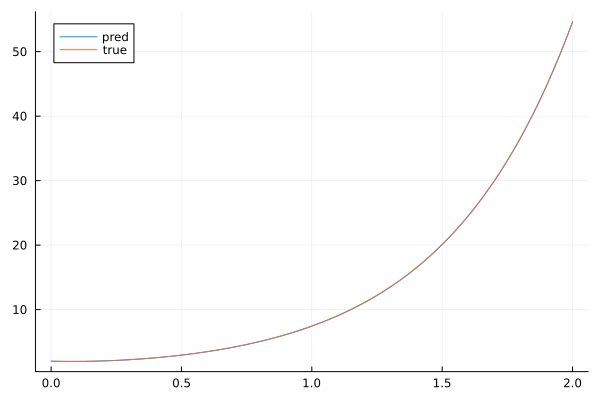

In [10]:
xs = reshape(range(0, 2, length=1000), 1, :)
u_pred = pinn.phi(xs, res.u)
u_true = @. exp(2xs)+exp(-3xs)

using Plots
plot(vec(xs),vec(u_pred), label="pred")
plot!(vec(xs),vec(u_true), label="true")

## Train with Adam

In [11]:
using OptimizationOptimisers
res = Optimization.solve(prob, BFGS(); maxiters=2000, callback=callback)

Loss: 274.9356664761556


Loss: 136.74736236060127


Loss: 40.02691774060246


Loss: 36.63321050704549
Loss: 35.92008800568417
Loss: 35.85143513652593


Loss: 35.751234917827034


Loss: 35.190345288369606


Loss: 35.04115542155697


Loss: 34.81114256736047
Loss: 34.55072265153837


Loss: 34.32358193477478


Loss: 34.2065465384599
Loss: 34.117948567613844


Loss: 33.96523920223961


Loss: 33.84767758389604
Loss: 33.78966721652485


Loss: 33.556690252469636


Loss: 33.411070300731666


Loss: 33.231070880746984


Loss: 33.078157082028625


Loss: 32.89564510499817


Loss: 32.30737428418995


Loss: 32.25036747279231


Loss: 32.05048842890855


Loss: 31.76783907784439


Loss: 31.619599073966935
Loss: 31.59174031152083


Loss: 31.466054141269222


Loss: 31.2182516313685


Loss: 31.10657233387434


Loss: 30.985010630002144


Loss: 30.878198543814246


Loss: 30.637418188258753


Loss: 30.551415882266785


Loss: 30.337400732495272


Loss: 30.107092620879058


Loss: 29.918325282297296


Loss: 29.75738106190981


Loss: 29.638018733335834


Loss: 29.516128265760397


Loss: 29.464885108025335
Loss: 29.377888720255243


Loss: 29.206703208364043


Loss: 29.02528752316463


Loss: 28.973730795193774


Loss: 28.818825298837613


Loss: 28.531984624485663


Loss: 28.438057518970908
Loss: 28.31307820796966


Loss: 28.26604518814387


Loss: 28.12915021162963


Loss: 27.945461520817503


Loss: 27.44852004239294


Loss: 27.391718470223335


Loss: 27.311090274509397


Loss: 27.221925503704895


Loss: 27.02165478372587


Loss: 26.732694088286966


Loss: 26.676296804509036


Loss: 26.536119169813997


Loss: 26.309864077500542


Loss: 26.12925718872211


Loss: 25.996181958154445


Loss: 25.76779313288351


Loss: 25.65616970339453


Loss: 25.510951466313355


Loss: 25.232605687642533


Loss: 25.074973258955385


Loss: 24.926089189773784


Loss: 24.518160225532426


Loss: 23.38832720346196


Loss: 23.06510109642538


Loss: 22.378119367205027


Loss: 22.15342077155918


Loss: 21.66403818464936


Loss: 21.445852190548226


Loss: 21.134966588180674


Loss: 21.00073737631404


Loss: 20.806800130394084


Loss: 20.60476757474543


Loss: 20.34780833644547


Loss: 20.08077333745025


Loss: 19.889708279241876


Loss: 19.65056728058765


Loss: 19.46968948999762


Loss: 19.27801680712873


Loss: 19.160491338050484


Loss: 18.908093944904703


Loss: 18.396094190938445


Loss: 18.286820359296325


Loss: 18.162635315590613


Loss: 18.082844824021386


Loss: 17.805258038308057


Loss: 17.44354090935304


Loss: 16.855327062682804


Loss: 16.51356362902951


Loss: 16.370166123445895


Loss: 16.10712372799191


Loss: 15.832766896766353


Loss: 15.098586048534965


Loss: 14.698620813382082


Loss: 14.660059886865541


Loss: 14.4243332297116


Loss: 14.13277132257918


Loss: 14.014499151097418


Loss: 13.944303592099253


Loss: 13.325702365063146


Loss: 12.577958628502698


Loss: 12.267310156333778


Loss: 11.870216185071861


Loss: 11.639712355528781


Loss: 11.497827947517305


Loss: 11.402818170046956


Loss: 11.24832175633932


Loss: 11.018067423011834


Loss: 10.491852640440873


Loss: 10.293321605067135


Loss: 10.242716429656024


Loss: 10.041517079348944


Loss: 9.738796421232564


Loss: 9.329743849464734


Loss: 9.270763135913578


Loss: 9.15356330984598


Loss: 8.910165648309269


Loss: 8.813726670013946


Loss: 8.689182180596791


Loss: 8.554927344910228


Loss: 8.430938185529453


Loss: 8.229912455473325


Loss: 8.008386077662335


Loss: 7.823751081391022


Loss: 7.623201728234534


Loss: 7.492900406615718


Loss: 7.181475751714721


Loss: 6.949195788284145


Loss: 6.801294494032431
Loss: 6.727620939067535


Loss: 6.633694041523093


Loss: 6.557351182437343


Loss: 6.331583077639686


Loss: 6.245528186994857


Loss: 6.147039920530897
Loss: 6.058289084170891


Loss: 5.959104315619132


Loss: 5.823433501021549


Loss: 5.673053015579261


Loss: 5.612630734416357
Loss: 5.5685001827358676


Loss: 5.470894274527636


Loss: 5.252093998417339


Loss: 5.082220433117815


Loss: 4.892936787497769


Loss: 4.599620692887964


Loss: 4.470709888463597


Loss: 4.386937465928483


Loss: 4.301647865491425


Loss: 4.236949744695595


Loss: 4.163246474104798


Loss: 4.0970847801487045


Loss: 4.033890378540029


Loss: 3.9464680570819914


Loss: 3.876574949784977


Loss: 3.7032193817769388


Loss: 3.58763860143687


Loss: 3.4585599418768145


Loss: 3.332744493433839


Loss: 3.2479070030931254


Loss: 3.1492577523517413
Loss: 3.1027269766132166


Loss: 3.0552021959184814


Loss: 2.940857390276195


Loss: 2.844619744910561


Loss: 2.7797711717952374


Loss: 2.521148755708309


Loss: 2.456929975776328


Loss: 2.3621584245504357


Loss: 2.2400168747143474


Loss: 2.181206263534539


Loss: 2.1128526607274773


Loss: 2.0807127712768736
Loss: 2.0333689260929453


Loss: 1.954899347068
Loss: 1.9006341503387063


Loss: 1.866496413262989


Loss: 1.7914502348804529
Loss: 1.754679168145305


Loss: 1.7045231934214762


Loss: 1.6431827566139452
Loss: 1.6069471849211403


Loss: 1.5625373449097975
Loss: 1.502151171277426


Loss: 1.4490443625728968
Loss: 1.399271616982826


Loss: 1.3394689710366467


Loss: 1.3114352760227947
Loss: 1.288358020330237


Loss: 1.2708057194605782
Loss: 1.2260950217737243


Loss: 1.1546814151609472


Loss: 1.1125390518855525


Loss: 1.090226506330912


Loss: 1.0374523398592377


Loss: 1.0226421557754113


Loss: 0.9973703868940804


Loss: 0.9685172373156762


Loss: 0.9087656293830766


Loss: 0.8644597648744917


Loss: 0.7981678929876961
Loss: 0.7397464810309001


Loss: 0.7165095662562533
Loss: 0.6991233535270235


Loss: 0.6312688114446966


Loss: 0.5837679145475207


Loss: 0.5282448783020793


Loss: 0.4867761328539027


Loss: 0.4612795184027167


Loss: 0.41993399233265843
Loss: 0.3913385904239283


Loss: 0.3564146647448206
Loss: 0.33206146274002263


Loss: 0.31490089932301374
Loss: 0.2731282458783641


Loss: 0.2567443685173149


Loss: 0.23218442433276362
Loss: 0.2103198450275781


Loss: 0.1929288476141438
Loss: 0.17957405918720376


Loss: 0.1699874990619421
Loss: 0.15287311420987462


Loss: 0.14009383701737868
Loss: 0.11979641119238273


Loss: 0.11035671902090789
Loss: 0.10312699374204379


Loss: 0.09337526811192581
Loss: 0.0862664321591834


Loss: 0.07962480733152216
Loss: 0.07514553696867236


Loss: 0.07035349400071352
Loss: 0.06390070859842172


Loss: 0.056044272693565246
Loss: 0.046672368234554354


Loss: 0.0391556647627628
Loss: 0.033846003669014066


Loss: 0.03241109403051556
Loss: 0.031043448426204805


Loss: 0.027613261973818855
Loss: 0.025299632899728204


Loss: 0.02190483636097482
Loss: 0.020469342221451362


Loss: 0.019835983277573146
Loss: 0.01933047761635049


Loss: 0.016887659377759538
Loss: 0.01485048285949231


Loss: 0.013820803564505347
Loss: 0.012540709200767374
Loss: 0.011703535869097424


Loss: 0.011214280468195937
Loss: 0.01046889233109978


Loss: 0.010145929102708881
Loss: 0.009860519460904209
Loss: 0.009375817713210373


Loss: 0.008585450602547024
Loss: 0.007959060604238502


Loss: 0.0075591571960428655
Loss: 0.007080442460435839
Loss: 0.0069658000834134665


Loss: 0.006368601283160767
Loss: 0.005835673708235028


Loss: 0.005597072790390481
Loss: 0.0053298105015637575
Loss: 0.005239722635677872


Loss: 0.004694365069161706
Loss: 0.00427478550865309


Loss: 0.004003704893112245
Loss: 0.003922637286130699
Loss: 0.0038482490796901965


Loss: 0.0033200981467469905
Loss: 0.003283924948378968
Loss: 0.003201121211296769


Loss: 0.002922152318874702
Loss: 0.002571321118405398


Loss: 0.002318033731205657
Loss: 0.002206239135848064
Loss: 0.002103093335341381


Loss: 0.0017730874368132165
Loss: 0.0016637491791159438
Loss: 0.001632056921009327


Loss: 0.0014180358730140662
Loss: 0.0013662091925833804
Loss: 0.001265994223683278


Loss: 0.0011982373487801322
Loss: 0.0010811309304371885


Loss: 0.0009896321752625927
Loss: 0.0008878333202798827


Loss: 0.0008250064712115925
Loss: 0.0007869101658545864
Loss: 0.0007305245415460405


Loss: 0.0006430038956894479


Loss: 0.0005740402710107629
Loss: 0.0005459030187296734
Loss: 0.00044508087645735183


Loss: 0.0003953580596742557
Loss: 0.0003406735790353346
Loss: 0.0003136456433041038


Loss: 0.0002802730249455347
Loss: 0.00024228910726886284
Loss: 0.00020439081711577485


Loss: 0.00016930100486145757
Loss: 0.00015145328632367014


Loss: 0.00010794726716068278
Loss: 9.020007200729048e-5
Loss: 7.289678246108863e-5


Loss: 5.760816343713455e-5
Loss: 4.8256670254900084e-5
Loss: 4.52012768858498e-5


Loss: 4.314377940973971e-5
Loss: 4.177261183366137e-5
Loss: 4.123016326311303e-5


Loss: 4.088654159135414e-5
Loss: 4.067638304688413e-5
Loss: 4.0103117296630266e-5


Loss: 3.879536138309437e-5
Loss: 3.771919987135551e-5
Loss: 3.573045542678192e-5


Loss: 3.380487721411703e-5
Loss: 3.307823978078704e-5
Loss: 3.216323158802103e-5


Loss: 3.14463501717462e-5
Loss: 3.0233142284436315e-5


Loss: 2.890614860909075e-5
Loss: 2.7084550951689622e-5
Loss: 2.5881837825621253e-5


Loss: 2.5236035995091324e-5
Loss: 2.4574394394325496e-5
Loss: 2.3655473632329347e-5


Loss: 2.315577925990213e-5
Loss: 2.2730456354600536e-5
Loss: 2.1487711141215867e-5


Loss: 2.1232021941610085e-5
Loss: 2.0050829130272577e-5
Loss: 1.9596675570937998e-5


Loss: 1.9411923811424742e-5
Loss: 1.8668203143982445e-5
Loss: 1.8471196179882696e-5


Loss: 1.8270291837024354e-5
Loss: 1.8007078624412095e-5
Loss: 1.7810554312558633e-5


Loss: 1.774028533906594e-5
Loss: 1.743798137198904e-5
Loss: 1.7309879147542383e-5


Loss: 1.70407515441034e-5
Loss: 1.688081972199814e-5
Loss: 1.6432433127270694e-5


Loss: 1.6159396011731964e-5
Loss: 1.587437176028841e-5
Loss: 1.5280457175779157e-5


Loss: 1.5166758544955027e-5
Loss: 1.4884893574765087e-5
Loss: 1.4648317847456821e-5


Loss: 1.4436778871854574e-5
Loss: 1.413863962860151e-5
Loss: 1.3989261019521597e-5


Loss: 1.3800197523649922e-5
Loss: 1.35984194211656e-5
Loss: 1.3192858421274112e-5


Loss: 1.266993852695336e-5
Loss: 1.2235292651316779e-5
Loss: 1.1448525597243692e-5


Loss: 9.905428004753827e-6
Loss: 8.432677947605157e-6


Loss: 7.671830637617443e-6
Loss: 7.2298442041397745e-6
Loss: 6.842586969054411e-6


Loss: 5.429779735637461e-6
Loss: 4.39970557982814e-6
Loss: 3.57772532160858e-6


Loss: 2.844752318845321e-6
Loss: 2.3748803011921934e-6
Loss: 2.1072783980107018e-6


Loss: 1.9456350303749424e-6
Loss: 1.7529480549529112e-6
Loss: 1.6739332541147646e-6


Loss: 1.5752863622643806e-6
Loss: 1.5057900464816671e-6
Loss: 1.4230174233271658e-6


Loss: 1.3026599378692238e-6
Loss: 1.2529910616429194e-6
Loss: 1.2226328266278422e-6


Loss: 1.202864580223791e-6
Loss: 1.198469265420161e-6
Loss: 1.196544505709643e-6


Loss: 1.191592002093038e-6
Loss: 1.1810013094601805e-6


Loss: 1.1606523761472702e-6
Loss: 1.1410529320056223e-6


Loss: 1.1324446116305382e-6
Loss: 1.125676563921758e-6


Loss: 1.1229954145371158e-6
Loss: 1.1207337816341132e-6


Loss: 1.1165452226771465e-6
Loss: 1.1063816729372067e-6
Loss: 1.0990366233749454e-6


Loss: 1.0801916775616869e-6
Loss: 1.0496562722658456e-6


Loss: 9.979596986701828e-7
Loss: 9.449385214200779e-7
Loss: 8.97158598599062e-7


Loss: 8.605874848448351e-7
Loss: 8.456543047093939e-7
Loss: 8.310698492413178e-7


Loss: 8.129395903644849e-7
Loss: 7.994500029253743e-7
Loss: 7.844271178020271e-7


Loss: 7.725774280447342e-7
Loss: 7.626824409961358e-7
Loss: 7.525394687211761e-7


Loss: 7.505955879324096e-7
Loss: 7.477664622303736e-7
Loss: 7.474720703286046e-7


Loss: 7.47105665230158e-7
Loss: 7.469280949084758e-7
Loss: 7.457066115526041e-7


Loss: 7.432236548124842e-7
Loss: 7.327456385119364e-7
Loss: 7.226293512363616e-7


Loss: 7.003868174929065e-7
Loss: 6.646726119491144e-7
Loss: 6.404617983758577e-7


Loss: 6.358365442662037e-7
Loss: 6.139168366590197e-7
Loss: 6.043127538022475e-7


Loss: 5.809423587225888e-7
Loss: 5.7038175101495e-7
Loss: 5.474412318969274e-7


Loss: 5.406989416252301e-7
Loss: 5.231431955360138e-7
Loss: 5.12394635578375e-7
Loss: 4.991335260636551e-7


Loss: 4.84853124166652e-7
Loss: 4.7034827720182103e-7
Loss: 4.478426514997827e-7


Loss: 4.4541175876653526e-7
Loss: 4.3369363753478645e-7
Loss: 4.296849958472279e-7
Loss: 4.250788490787372e-7


Loss: 4.17463491043627e-7
Loss: 4.1519906429550476e-7
Loss: 4.057245836185987e-7


Loss: 3.9783322920268897e-7
Loss: 3.849598295128824e-7
Loss: 3.6775965794148583e-7


Loss: 3.5372891248744015e-7
Loss: 3.4515580962802754e-7
Loss: 3.3676008191238073e-7


Loss: 3.3049396886610705e-7
Loss: 3.263112944022378e-7
Loss: 3.2186172848389904e-7


Loss: 3.157998244369729e-7
Loss: 3.0840316733142433e-7
Loss: 3.048536947396017e-7


Loss: 2.941679281984986e-7
Loss: 2.8627773654301836e-7
Loss: 2.7900076678509914e-7
Loss: 2.7197905720795135e-7


Loss: 2.6863446122586094e-7
Loss: 2.6413648671620415e-7
Loss: 2.595050707800055e-7
Loss: 2.5272279915007184e-7


Loss: 2.468425165667356e-7
Loss: 2.414391164153046e-7
Loss: 2.38982195482286e-7


Loss: 2.3218434567997326e-7
Loss: 2.2940673462005588e-7
Loss: 2.2314998251556103e-7
Loss: 2.19411855870501e-7


Loss: 2.1510348410499087e-7
Loss: 2.106850303511992e-7
Loss: 2.0608449941006855e-7


Loss: 2.0166895645573377e-7
Loss: 1.9804190722118648e-7
Loss: 1.962437693418339e-7


Loss: 1.9286784908433532e-7
Loss: 1.913178054844017e-7
Loss: 1.8862018723264805e-7


Loss: 1.8691297411552043e-7
Loss: 1.838556494130016e-7
Loss: 1.8188141478622194e-7


Loss: 1.795011204579088e-7
Loss: 1.7879975999021885e-7
Loss: 1.7619911584670758e-7
Loss: 1.7466127398606964e-7


Loss: 1.7087119613530636e-7
Loss: 1.6850607079098142e-7
Loss: 1.6437666632858456e-7


Loss: 1.6126553578019582e-7
Loss: 1.585992854438627e-7
Loss: 1.5611988833427302e-7


Loss: 1.5421527293425136e-7
Loss: 1.4795209310304213e-7
Loss: 1.462773545821035e-7


Loss: 1.4024173938277781e-7
Loss: 1.3671702317291145e-7
Loss: 1.3416895900467393e-7


Loss: 1.308222549302014e-7
Loss: 1.29120912432708e-7
Loss: 1.2793234309468305e-7


Loss: 1.268813573752092e-7
Loss: 1.2568380699340166e-7
Loss: 1.2433218723999852e-7


Loss: 1.2283342110403213e-7
Loss: 1.2206146878986436e-7


Loss: 1.2113121802499115e-7
Loss: 1.1998827306881014e-7
Loss: 1.181551741796843e-7


Loss: 1.1752842719639187e-7
Loss: 1.1348400452955278e-7
Loss: 1.0837663265109248e-7


Loss: 1.0597298823177547e-7
Loss: 9.878823113481954e-8
Loss: 9.586802562509114e-8


Loss: 9.469737159620804e-8
Loss: 9.344869559882536e-8
Loss: 9.207580610479221e-8


Loss: 9.125501258689172e-8
Loss: 9.042395677578307e-8
Loss: 8.998645506326458e-8


Loss: 8.929750145328056e-8
Loss: 8.661980663007337e-8
Loss: 8.228431168465792e-8


Loss: 7.929591161546146e-8
Loss: 7.863974599400043e-8
Loss: 7.710192863643491e-8


Loss: 7.620609524581201e-8
Loss: 7.484197098651658e-8
Loss: 7.350390936396305e-8


Loss: 7.249507458734174e-8
Loss: 7.111846212648658e-8
Loss: 6.917127409332334e-8


Loss: 6.5464087316522e-8
Loss: 6.334974897826602e-8
Loss: 6.255578010735612e-8


Loss: 6.136590994047616e-8
Loss: 5.987688012061559e-8


Loss: 5.799202485020723e-8
Loss: 5.6369057655926646e-8
Loss: 5.4807155961830954e-8


Loss: 5.305853945244936e-8
Loss: 5.175732838759722e-8
Loss: 5.004318804561737e-8


Loss: 4.792321949342964e-8
Loss: 4.6429135935831625e-8
Loss: 4.5552663549475805e-8


Loss: 4.405441932939403e-8
Loss: 4.318093684501035e-8
Loss: 4.1328833262592187e-8


Loss: 3.987836026997466e-8
Loss: 3.884234756791617e-8
Loss: 3.758307005128051e-8


Loss: 3.5384009950377115e-8
Loss: 3.4585500250815583e-8
Loss: 3.3200375399642774e-8


Loss: 3.203565404305493e-8
Loss: 3.132845135333401e-8
Loss: 3.074057936187256e-8


Loss: 2.9318629971624552e-8
Loss: 2.841742355975064e-8
Loss: 2.7843447091126117e-8


Loss: 2.6933988416595908e-8
Loss: 2.5925515550951983e-8
Loss: 2.5327295464565765e-8


Loss: 2.5130572317694518e-8
Loss: 2.44849840319673e-8
Loss: 2.3937254908052787e-8


Loss: 2.2911409295508567e-8
Loss: 2.2106782166580653e-8
Loss: 2.1624282894901406e-8
Loss: 2.1168937054723185e-8


Loss: 2.0134162306105437e-8
Loss: 1.958796397741351e-8
Loss: 1.9094857060615842e-8


Loss: 1.8826402135059174e-8
Loss: 1.824589396817444e-8
Loss: 1.782249765973717e-8


Loss: 1.7299809092291586e-8
Loss: 1.7150745209220318e-8
Loss: 1.6758237462955002e-8


Loss: 1.6591305267051377e-8
Loss: 1.6432029464337794e-8
Loss: 1.620196049635157e-8


Loss: 1.6021873254517835e-8
Loss: 1.578647518451407e-8


Loss: 1.5492181155311437e-8
Loss: 1.5473028720056625e-8
Loss: 1.5299262984137437e-8


Loss: 1.5086969470659354e-8
Loss: 1.5030070779974532e-8
Loss: 1.497116268189523e-8


Loss: 1.4952501600041496e-8
Loss: 1.4900458557478516e-8


Loss: 1.4887747936123164e-8


Loss: 1.4883197899937492e-8


Loss: 1.4878748634472427e-8


Loss: 1.4868481124809037e-8


Loss: 1.484598376377356e-8


Loss: 1.4823262927045106e-8


Loss: 1.4819718295448436e-8


Loss: 1.4816426484723583e-8


Loss: 1.481604178708501e-8


Loss: 1.4814411304005339e-8


Loss: 1.4814411304005339e-8


Loss: 1.4814411304005339e-8


u: ComponentVector{Float64}(layer_1 = (weight = [0.5695119192938922; 0.3777965983100109; … ; 0.1867228635236578; -0.5669360797237354;;], bias = [-1.3714017991614453; -0.21148954798299863; … ; -0.5891954456150054; 0.8781533060100996;;]), layer_2 = (weight = [0.018112729491084528 1.0325553459078933 … -0.14325151157674307 0.40267880868516337; -0.4905167488808895 0.17618174213752794 … 0.4883868471489762 0.06801616392318706; … ; 0.5050760599938301 1.008952934210667 … -0.9657941415238576 0.25902080049316006; -0.02433353872736413 1.2918677448694693 … -0.14070828721180478 -0.06737011640029925], bias = [-0.03080653311950684; 1.2354189918358893; … ; -0.5208681490424365; -0.39125964605677693;;]), layer_3 = (weight = [-0.8594174099865115 0.3366762245046605 … -1.476188078863834 -0.024348281754714207; -0.46878857985225536 0.9340146572263646 … -0.398906563449627 0.585851462233842; … ; -0.6672013258136272 -0.8227473464545738 … 0.9776421574458959 -0.12392214398267355; 1.1927767597696903 -0.437952345173

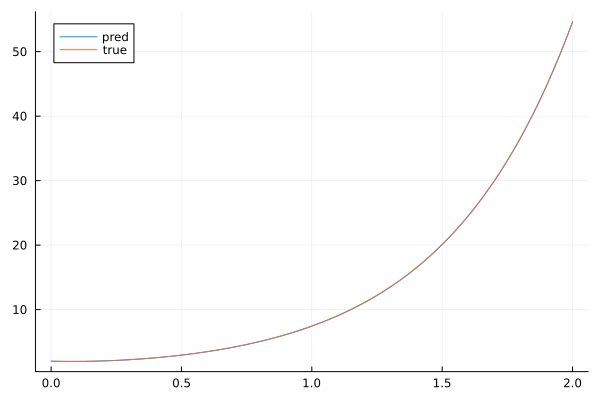

In [12]:
xs = reshape(range(0, 2, length=1000), 1, :)
u_pred = pinn.phi(xs, res.u)
u_true = @. exp(2xs)+exp(-3xs)

using Plots
plot(vec(xs),vec(u_pred), label="pred")
plot!(vec(xs),vec(u_true), label="true")

## Train with tanh + BFGS

In [14]:
pinn = PINN(FullyConnected((1, 16, 16, 16, 16, 1), tanh))
prob = Sophon.discretize(ode, pinn, sampler, strategy)

res = Optimization.solve(prob, BFGS(); maxiters=2000, callback=callback)

Loss: 1055.519951006574


Loss: 235.49024155340533
Loss: 160.9526367736632


Loss: 150.86138068360822
Loss: 134.22765901809004


Loss: 133.52172880032023
Loss: 133.48961722669705


Loss: 133.46463265728238
Loss: 133.44356177491463


Loss: 130.38432603625097
Loss: 130.3607602035779


Loss: 129.90833575372397


Loss: 125.59854097924544
Loss: 125.46432553265738


Loss: 122.12448503005314


Loss: 67.31343697294781
Loss: 64.57242218059243
Loss: 63.38914465971058


Loss: 62.82446536722241
Loss: 62.66037917155233


Loss: 51.891349262042645
Loss: 50.88372817410668


Loss: 49.79724957448526


Loss: 48.16133731734041
Loss: 47.37292658067219
Loss: 45.66565208313126


Loss: 43.644137484446716
Loss: 42.16455410575657


Loss: 41.058064567879725
Loss: 38.64639365262896
Loss: 37.9301942928897


Loss: 36.99448099385674
Loss: 36.64038044744896
Loss: 36.27052114149412


Loss: 35.82540957115021
Loss: 35.70102839580255
Loss: 35.69442364308284


Loss: 35.691143568554985
Loss: 35.69007473108818


Loss: 35.688321125312385
Loss: 35.68747155245181
Loss: 35.68556432182572


Loss: 35.6842331363017
Loss: 35.682267846864
Loss: 35.68048626723384


Loss: 35.67926359714857
Loss: 35.677155826227434
Loss: 35.676184940628914


Loss: 35.67444956661898
Loss: 35.67319175829453
Loss: 35.67013109852617


Loss: 35.66927228845219
Loss: 35.66822400578102
Loss: 35.66722476378592


Loss: 35.666788580033824
Loss: 35.66547677869124
Loss: 35.6650757919464


Loss: 35.66413616650165
Loss: 35.66341493211826
Loss: 35.66234975898058


Loss: 35.66205938766751
Loss: 35.661412471950555


Loss: 35.66116671079305
Loss: 35.66083916342454
Loss: 35.660295885708244


Loss: 35.659201212280536
Loss: 35.65827968558674
Loss: 35.658195359034735


Loss: 35.65768202114389
Loss: 35.65718125567839


Loss: 35.656424666853205
Loss: 35.65637199120155
Loss: 35.65615631295393


Loss: 35.655677797418356
Loss: 35.655518935157396
Loss: 35.65538943336373


Loss: 35.65513432512505
Loss: 35.65488994676973
Loss: 35.65478846013232


Loss: 35.65440101009518
Loss: 35.654257969145824
Loss: 35.65392568469755


Loss: 35.65377347725468
Loss: 35.65332368498506


Loss: 35.652982845802114


Loss: 35.65251974639032
Loss: 35.652479433726135
Loss: 35.6522078966606


Loss: 35.65214676934815
Loss: 35.65209408883509


Loss: 35.65190022730194
Loss: 35.65153287140768
Loss: 35.65146161310283


Loss: 35.65126105930831
Loss: 35.651058439422144
Loss: 35.65076429062378


Loss: 35.650730847481086
Loss: 35.650533404599365


Loss: 35.65039698130163
Loss: 35.65033636054857
Loss: 35.65017585919276


Loss: 35.65008071683865
Loss: 35.64986560830452
Loss: 35.64970021176756


Loss: 35.6495268672069
Loss: 35.64943710129361
Loss: 35.64931569019607


Loss: 35.64919311608126
Loss: 35.64905329088411
Loss: 35.649007653244134
Loss: 35.64887814561446


Loss: 35.64875008089605
Loss: 35.648676409873026
Loss: 35.64847099580174


Loss: 35.64833516743112
Loss: 35.6481515505473
Loss: 35.64804289368739


Loss: 35.647934195530766
Loss: 35.64774054122839
Loss: 35.647647070135015


Loss: 35.647400688921216
Loss: 35.64725793536233
Loss: 35.64708824766699
Loss: 35.64693298121556


Loss: 35.64679605601102
Loss: 35.64658593620565
Loss: 35.64647344215626


Loss: 35.64622608962993
Loss: 35.646090920594325
Loss: 35.64582686261018


Loss: 35.64569467042999
Loss: 35.645357365030996


Loss: 35.64516724016969
Loss: 35.64501700426602
Loss: 35.64468519749912


Loss: 35.644413313019996
Loss: 35.64419145486785
Loss: 35.64375187920273


Loss: 35.643639698885195
Loss: 35.643233100504055
Loss: 35.64281701384898


Loss: 35.642608401737455


Loss: 35.64220899895666
Loss: 35.64207669527702
Loss: 35.64177203829631
Loss: 35.641621738070604


Loss: 35.64146164877809
Loss: 35.64095864473479
Loss: 35.64090870348665


Loss: 35.640782196553786
Loss: 35.640724241293135
Loss: 35.64056074274868
Loss: 35.64048862632233


Loss: 35.640407554202056
Loss: 35.64035057777375
Loss: 35.6402048936725


Loss: 35.64008495773702
Loss: 35.64005079520311
Loss: 35.640019556899645
Loss: 35.63997759257356


Loss: 35.63992008060438
Loss: 35.639879626099486
Loss: 35.63985000550245


Loss: 35.63973533844882
Loss: 35.639633888796915


Loss: 35.63953290492156
Loss: 35.63951372452203
Loss: 35.63949961715911


Loss: 35.63948026423297
Loss: 35.639450301095934
Loss: 35.63940457672535


Loss: 35.639334520325804
Loss: 35.63924602042764
Loss: 35.63920379183225


Loss: 35.63915146481115
Loss: 35.63900036599358
Loss: 35.638483294665065


Loss: 35.63825876688594
Loss: 35.63780156311905
Loss: 35.63723683416866


Loss: 35.63688727728864
Loss: 35.63675789555959
Loss: 35.636603974011585


Loss: 35.636413255645884
Loss: 35.636182126606286


Loss: 35.63587868494874
Loss: 35.63584246571349
Loss: 35.63571339125688


Loss: 35.6355676858017
Loss: 35.635178746338205
Loss: 35.63426223425201


Loss: 35.63393400830605
Loss: 35.633812882393975
Loss: 35.63333540174428


Loss: 35.63308194011979
Loss: 35.63257062540312
Loss: 35.63198148199146
Loss: 35.631398882145746


Loss: 35.63107790092183
Loss: 35.63100781658396
Loss: 35.63059908699974


Loss: 35.63041512123128
Loss: 35.6300431337915
Loss: 35.629529109621295


Loss: 35.62877614378021
Loss: 35.62735531827364
Loss: 35.6252554169939


Loss: 35.62355655311542
Loss: 35.62146034973856
Loss: 35.621187073549486


Loss: 35.62068084573211
Loss: 35.62020420363712


Loss: 35.618635195019976
Loss: 35.61364724536999


Loss: 35.61234755541943
Loss: 35.61070469419131
Loss: 35.60860753830783
Loss: 35.605791211632265


Loss: 35.60456612564285
Loss: 35.60179294786023
Loss: 35.6003590281177
Loss: 35.59720326475544


Loss: 35.59642814218071
Loss: 35.59453968130333


Loss: 35.593202967143014
Loss: 35.590342428687066
Loss: 35.589668471375056


Loss: 35.58876931692492
Loss: 35.588528776065424
Loss: 35.588382774782794
Loss: 35.58829725024264


Loss: 35.588212353054026
Loss: 35.588179882475195


Loss: 35.58812536877399
Loss: 35.58809600505058


Loss: 35.58808736383087
Loss: 35.588069771449476


Loss: 35.58801744090629
Loss: 35.58799655153722
Loss: 35.58794461002026


Loss: 35.58787228242781
Loss: 35.58773356544867
Loss: 35.58758403666281


Loss: 35.587526288645854


Loss: 35.58746817259295
Loss: 35.58742183467304
Loss: 35.58731349900361


Loss: 35.58720827280688
Loss: 35.5870980060577
Loss: 35.5867511504069


Loss: 35.58638968002534
Loss: 35.586240341940375
Loss: 35.586109921541954


Loss: 35.585818064296994
Loss: 35.585460397131165
Loss: 35.585373507090765


Loss: 35.585295512156414
Loss: 35.58517900902615
Loss: 35.58497507402262


Loss: 35.58479225679316
Loss: 35.58471968117589
Loss: 35.584617552602694


Loss: 35.584565606324716
Loss: 35.58442692140121
Loss: 35.58435399546951


Loss: 35.584116095504164
Loss: 35.58383634151018


Loss: 35.58364162874412
Loss: 35.58346501548748
Loss: 35.583171624516254
Loss: 35.58304541079695


Loss: 35.582944973683475
Loss: 35.58281885107915
Loss: 35.58273176572425


Loss: 35.58267244423806
Loss: 35.58265219318918
Loss: 35.582631706729174


Loss: 35.58246878851872
Loss: 35.5823369327472


Loss: 35.58214270017703
Loss: 35.5819466432242
Loss: 35.581611177242245


Loss: 35.58151144449806
Loss: 35.581290035194236
Loss: 35.581097800696575


Loss: 35.58097687277169
Loss: 35.58073179444676


Loss: 35.58058450688223
Loss: 35.58043032008629
Loss: 35.58035236936107
Loss: 35.58021354282915


Loss: 35.58012968498268
Loss: 35.579994948607194
Loss: 35.579816468861615


Loss: 35.57944426757067
Loss: 35.57903980523982
Loss: 35.5781172761778
Loss: 35.57790412253009


Loss: 35.577443749077126
Loss: 35.57725129430881
Loss: 35.576701051010566


Loss: 35.57577899887229
Loss: 35.57465530265409
Loss: 35.574236502296486


Loss: 35.573358858670595
Loss: 35.57209100062448
Loss: 35.57140569210051


Loss: 35.570601757546136
Loss: 35.570233790470255
Loss: 35.569410564202684


Loss: 35.56865210846866
Loss: 35.568412079836094
Loss: 35.5676592688839


Loss: 35.56736476477269
Loss: 35.56725688453448
Loss: 35.5668128459111


Loss: 35.56659537321482
Loss: 35.56640898997046
Loss: 35.56633864074326


Loss: 35.566321863193636
Loss: 35.5663194021466
Loss: 35.56631890846295


Loss: 35.566312815194195
Loss: 35.566273114744064
Loss: 35.5662524092917


Loss: 35.56618640127268
Loss: 35.566134287904994


Loss: 35.56610910109187
Loss: 35.56609073461479
Loss: 35.56605729281958


Loss: 35.566020201201184
Loss: 35.56597927919898
Loss: 35.5659013405762


Loss: 35.56588193015192
Loss: 35.56583591641358
Loss: 35.56576168686912


Loss: 35.56566567328705
Loss: 35.56556623674679
Loss: 35.56550895392663


Loss: 35.56546753277447
Loss: 35.5654148633653


Loss: 35.56537387535225
Loss: 35.56531554648086
Loss: 35.56523188743319


Loss: 35.56518000864877
Loss: 35.56506215209944
Loss: 35.564946166247985


Loss: 35.564855680647334
Loss: 35.56471876050244
Loss: 35.56458918295952


Loss: 35.564515758335695
Loss: 35.56441424198428
Loss: 35.56429730414621


Loss: 35.56389045567157
Loss: 35.56357924031444


Loss: 35.56310725976309
Loss: 35.563057245036994
Loss: 35.56278027305319


Loss: 35.56255023957071
Loss: 35.56230132644768
Loss: 35.56179076658425


Loss: 35.56172045150789
Loss: 35.56099131412921
Loss: 35.56054093280614


Loss: 35.56035458888322
Loss: 35.56004679464951
Loss: 35.55983355818185


Loss: 35.559434994546585
Loss: 35.55899408411448
Loss: 35.558681250779344


Loss: 35.55851680523244
Loss: 35.55800622320605
Loss: 35.55776215318


Loss: 35.55716487659
Loss: 35.55699458710582
Loss: 35.556641832774865


Loss: 35.556447418578
Loss: 35.556360457414016
Loss: 35.556031609972486


Loss: 35.55581381860796
Loss: 35.55550946738769
Loss: 35.55505652443885


Loss: 35.554111388000784
Loss: 35.55331595651673
Loss: 35.55256823017797


Loss: 35.55199680449745
Loss: 35.55163937774455
Loss: 35.55049704437095


Loss: 35.55029850980729
Loss: 35.549019805903036
Loss: 35.547931581969


Loss: 35.54753665310696
Loss: 35.54736517634295
Loss: 35.54722368329746


Loss: 35.54713773307117
Loss: 35.54647366023445
Loss: 35.545819295935


Loss: 35.54541044585883
Loss: 35.5445463475569
Loss: 35.543661816423516


Loss: 35.542025073928656
Loss: 35.541110644825736
Loss: 35.54054207797328
Loss: 35.54018107313153


Loss: 35.5396560887381
Loss: 35.53850823478854
Loss: 35.537194701055974


Loss: 35.536697780433435
Loss: 35.53658676380983
Loss: 35.53656465952288


Loss: 35.5365559000138
Loss: 35.53650167549585


Loss: 35.53624383862907
Loss: 35.53597759996336
Loss: 35.53578895410238


Loss: 35.53558102200644
Loss: 35.5354473857953
Loss: 35.53524876286892


Loss: 35.53508017737344
Loss: 35.53494668589477


Loss: 35.53484132352168
Loss: 35.53475711383422
Loss: 35.534703963847505


Loss: 35.534661635402614
Loss: 35.534602528067985
Loss: 35.53454951452843


Loss: 35.53448779483259
Loss: 35.534360935578555
Loss: 35.53429921082221


Loss: 35.53424580337713
Loss: 35.53416102554058
Loss: 35.534082324963514


Loss: 35.53402984474287
Loss: 35.53395448210748
Loss: 35.53390077793241


Loss: 35.533766842611094
Loss: 35.53367325834818
Loss: 35.53335633152922


Loss: 35.533223147453185
Loss: 35.53308627353344
Loss: 35.53288190607335


Loss: 35.53270531503571
Loss: 35.53257724010541
Loss: 35.532109151070294


Loss: 35.53146658533827
Loss: 35.53069349965401
Loss: 35.529449810462836


Loss: 35.5290991874428
Loss: 35.52819330057339
Loss: 35.527769803094486


Loss: 35.527555465347525
Loss: 35.527381549513834
Loss: 35.52724207257785


Loss: 35.527061829719734
Loss: 35.52685301473339


Loss: 35.52657635068521
Loss: 35.526501950038636
Loss: 35.52599511783213


Loss: 35.52537939148905
Loss: 35.5252108858118
Loss: 35.52446038289259


Loss: 35.523930769081346
Loss: 35.52379533801089
Loss: 35.52352741459477
Loss: 35.52348065508409


Loss: 35.52334799979827
Loss: 35.52305493845742
Loss: 35.522738371192155


Loss: 35.52247497772288
Loss: 35.52237532304282
Loss: 35.52231833157237


Loss: 35.52227709367968
Loss: 35.5222352927205
Loss: 35.522210582878806


Loss: 35.52219262528535
Loss: 35.5221865349786
Loss: 35.52217850894009


Loss: 35.52212887794704
Loss: 35.52206374712139
Loss: 35.52196399103893


Loss: 35.52191078676487
Loss: 35.52182317434816


Loss: 35.52179863339956
Loss: 35.521769194418155
Loss: 35.52175282159893


Loss: 35.52172853510737
Loss: 35.52139098900238
Loss: 35.52104207102422


Loss: 35.520815496473794
Loss: 35.52072861150028
Loss: 35.52067924501746


Loss: 35.52063149226405
Loss: 35.52058124364459
Loss: 35.52054717980372


Loss: 35.52053518636822
Loss: 35.520531549721376
Loss: 35.52053115027031


Loss: 35.520530551000064
Loss: 35.52052889501356
Loss: 35.5205265947672


Loss: 35.520522514144595
Loss: 35.520483109240345
Loss: 35.520444675387104


Loss: 35.52041258709569
Loss: 35.520389258135225
Loss: 35.52036874541133


Loss: 35.52035752988324
Loss: 35.52034676502917
Loss: 35.52033358521654


Loss: 35.520322698752125
Loss: 35.520319952667506
Loss: 35.520317539658066


Loss: 35.520317162036584
Loss: 35.52031709596541
Loss: 35.520316484261286


Loss: 35.52031528724426
Loss: 35.520310449703146


Loss: 35.52029437173582
Loss: 35.520277916830175
Loss: 35.52025703396524


Loss: 35.520230670725134
Loss: 35.52019502936874
Loss: 35.520182078273045


Loss: 35.520169511935705
Loss: 35.520167360238794
Loss: 35.520164750139145


Loss: 35.52016433491646
Loss: 35.520163944826756
Loss: 35.52016420775516


Loss: 35.52016367843754
Loss: 35.52016347772987
Loss: 35.52016297167316


Loss: 35.52015996764357
Loss: 35.52012861042532


Loss: 35.520114598363996
Loss: 35.52010077034189
Loss: 35.52008934110633
Loss: 35.52006454689925


Loss: 35.52004985286571
Loss: 35.52002986634398
Loss: 35.51999521437436


Loss: 35.51998911792627
Loss: 35.51996224823046
Loss: 35.51994564928123
Loss: 35.51991455790946


Loss: 35.519903892652934
Loss: 35.51988560287082
Loss: 35.519872197141815
Loss: 35.51986601717008


Loss: 35.51985141113819
Loss: 35.51984130983986
Loss: 35.51981614142986


Loss: 35.519792558284706
Loss: 35.51978874357699
Loss: 35.5197785974549
Loss: 35.51977103054667


Loss: 35.519764610098115
Loss: 35.519750472340654
Loss: 35.51973580066224


Loss: 35.5197159483102
Loss: 35.5197138269476
Loss: 35.51970014080569


Loss: 35.51969369993685
Loss: 35.51968735104955
Loss: 35.51967582915725


Loss: 35.51965911127615
Loss: 35.51964169405482
Loss: 35.51962936871122


Loss: 35.51962349863479
Loss: 35.51961667745043
Loss: 35.51960958709858


Loss: 35.51960081375289
Loss: 35.51959153748534


Loss: 35.51958418157363
Loss: 35.519580586027004
Loss: 35.51957370502106


Loss: 35.51956356211136
Loss: 35.51955810935319
Loss: 35.51955562653248


Loss: 35.51954910455721
Loss: 35.519543215137595
Loss: 35.51954038649011


Loss: 35.51953718332467
Loss: 35.51953347948334
Loss: 35.519530470411596


Loss: 35.519528764876455
Loss: 35.51952825417318
Loss: 35.51952775400954


Loss: 35.51952481529936
Loss: 35.519524112054675


Loss: 35.51952087607063
Loss: 35.51951651130088


Loss: 35.5195083539321
Loss: 35.51950708199499
Loss: 35.519495267126246


Loss: 35.51947898281486
Loss: 35.519471920431904
Loss: 35.51945334681156


Loss: 35.519442735563445
Loss: 35.51944021337104
Loss: 35.51943793649892


Loss: 35.51943724375104
Loss: 35.5194366528192
Loss: 35.51943703314824


Loss: 35.51943585153785
Loss: 35.51943071141749
Loss: 35.519424357478464


Loss: 35.519421799140275
Loss: 35.519415407346855
Loss: 35.51941012876883


Loss: 35.519406937114056
Loss: 35.519403327573684
Loss: 35.519395415801924


Loss: 35.519386236054245
Loss: 35.519383894360075
Loss: 35.5193807188829
Loss: 35.519378414777435


Loss: 35.519373806193556
Loss: 35.51936976223637
Loss: 35.519363973348334


Loss: 35.519360225490814
Loss: 35.5193512698615
Loss: 35.51934452273761


Loss: 35.51933851525864
Loss: 35.51933432151236
Loss: 35.519325374710725
Loss: 35.51932132074207


Loss: 35.51931647560757
Loss: 35.51931180170081
Loss: 35.51930578950387
Loss: 35.51929884728676


Loss: 35.519295640265916
Loss: 35.51928739077916
Loss: 35.519285993800935


Loss: 35.51927815879993
Loss: 35.519271564836075
Loss: 35.51926721257865


Loss: 35.51925777690688
Loss: 35.519252934924445
Loss: 35.51923996202431


Loss: 35.51923332902556
Loss: 35.51922548393953
Loss: 35.51922100914198


Loss: 35.51921966625512
Loss: 35.51921534649779
Loss: 35.51921299510763


Loss: 35.519203969008366
Loss: 35.519196682590724
Loss: 35.51919569952533
Loss: 35.5191918366655


Loss: 35.519189418579984
Loss: 35.51918515684702
Loss: 35.519182243649055


Loss: 35.51917823986078
Loss: 35.51916798751021
Loss: 35.51916417821801


Loss: 35.51915880184688
Loss: 35.5191564283064
Loss: 35.51915291617004


Loss: 35.51915108632075
Loss: 35.51914821462118
Loss: 35.5191441878458


Loss: 35.519141654759196
Loss: 35.519137757900104
Loss: 35.51913541216058


Loss: 35.51913304716898
Loss: 35.51912963753639
Loss: 35.51912620245361


Loss: 35.51912182577405
Loss: 35.519112112712946
Loss: 35.51911037921373


Loss: 35.51910621557268
Loss: 35.519102384848246
Loss: 35.519098789158065
Loss: 35.51909866162377


Loss: 35.51909657873399
Loss: 35.519093787314624
Loss: 35.51909314532739


Loss: 35.51909063836317
Loss: 35.51908695009502
Loss: 35.51908204717152


Loss: 35.519080930208965
Loss: 35.5190786621653
Loss: 35.519076271824005
Loss: 35.519072053447786


Loss: 35.519068136933356
Loss: 35.51906502027834
Loss: 35.519062106711715


Loss: 35.5190579729359
Loss: 35.51905580219799
Loss: 35.51905285062135


Loss: 35.51905156402955
Loss: 35.51904816662743
Loss: 35.51904575412543


Loss: 35.51904065177679
Loss: 35.519036247901475
Loss: 35.51902154419701


Loss: 35.51901852181805
Loss: 35.519015008027885
Loss: 35.51901340425324


Loss: 35.51901122422777
Loss: 35.5190097576477


Loss: 35.51900644387374
Loss: 35.519004076971584
Loss: 35.51900182263698


Loss: 35.51899946083225
Loss: 35.518999115743284
Loss: 35.51899574934331


Loss: 35.51899438351496
Loss: 35.51899132888455
Loss: 35.51898366665095


Loss: 35.5189766441486
Loss: 35.518973282701765
Loss: 35.5189630191668
Loss: 35.51895791514012


Loss: 35.518956650435165
Loss: 35.51895555857104
Loss: 35.51895408439355


Loss: 35.51894956554485
Loss: 35.51894358543702
Loss: 35.51893979564897


Loss: 35.518938534643134
Loss: 35.518936604434366
Loss: 35.518934881610825


Loss: 35.51892923232582
Loss: 35.51892106658742
Loss: 35.51891676060284


Loss: 35.51891291766985
Loss: 35.51891216942122
Loss: 35.51890829214084


Loss: 35.518905560432735
Loss: 35.51890494417714
Loss: 35.518902628979994


Loss: 35.51889976795913
Loss: 35.518896049912975
Loss: 35.51889434341509


Loss: 35.51889303460969
Loss: 35.518890958404384
Loss: 35.51889024532467


Loss: 35.51888743202234
Loss: 35.51888442864514
Loss: 35.518876849445604


Loss: 35.518873515285556
Loss: 35.51886894671449
Loss: 35.51886236371112


Loss: 35.51885955069285
Loss: 35.5188543025332
Loss: 35.51884796184039


Loss: 35.51884222690163
Loss: 35.51883676986566
Loss: 35.51883345854215
Loss: 35.51882924253127


Loss: 35.51882219054369
Loss: 35.518814615914536
Loss: 35.518809079281


Loss: 35.518807005158145
Loss: 35.518802599705346


Loss: 35.51879990605451
Loss: 35.51879528199615
Loss: 35.51879191843278


Loss: 35.51878844567584
Loss: 35.51878620287306
Loss: 35.518784430025995


Loss: 35.51878079063185
Loss: 35.51877534429142
Loss: 35.51877043851344


Loss: 35.51876572199224
Loss: 35.51875730647213
Loss: 35.518751814465


Loss: 35.5187473241542
Loss: 35.51874137954137
Loss: 35.51873676959739


Loss: 35.518724892426555
Loss: 35.5187192560469
Loss: 35.51871213437406


Loss: 35.51870872313624
Loss: 35.51870722565901


Loss: 35.518704730312045
Loss: 35.51870077742031


Loss: 35.5186942876182
Loss: 35.51869279076626
Loss: 35.51869197667354


Loss: 35.518689989290294
Loss: 35.518685958693695
Loss: 35.518678651014845


Loss: 35.51866887285001
Loss: 35.51864208041413
Loss: 35.51863015180911


Loss: 35.518610897566724
Loss: 35.518601115127325
Loss: 35.51859092438269
Loss: 35.51858660172166


Loss: 35.518582472416455
Loss: 35.51858023944856
Loss: 35.51857587383785


Loss: 35.51857375408041
Loss: 35.518571929481546


Loss: 35.518570607894304
Loss: 35.51856757697046
Loss: 35.51856069749446


Loss: 35.51854912232414
Loss: 35.518533771924105


Loss: 35.51852209692007
Loss: 35.518488233317264
Loss: 35.51841494645742


Loss: 35.518326005231444
Loss: 35.518250045683516
Loss: 35.51820414796168
Loss: 35.518124456544044


Loss: 35.51811174640096
Loss: 35.51808809539875
Loss: 35.51807115023787


Loss: 35.518057388595764
Loss: 35.518039932719525
Loss: 35.51801714898594


Loss: 35.51799759498949
Loss: 35.51797215812075


Loss: 35.51794211273096
Loss: 35.51791743297577
Loss: 35.51791457304624


Loss: 35.51789970870473
Loss: 35.51789208004947
Loss: 35.51787748009408


Loss: 35.51785978991494
Loss: 35.517836833623264
Loss: 35.517818824497034


Loss: 35.51780694110179
Loss: 35.5177810338019
Loss: 35.51776774723086


Loss: 35.51773941184647
Loss: 35.51771866482639
Loss: 35.51770185470503


Loss: 35.517694926280065
Loss: 35.51768223031749
Loss: 35.51767815701781


Loss: 35.517668017866534
Loss: 35.51765442321028
Loss: 35.51764377060865


Loss: 35.517635775306964
Loss: 35.51763079395736
Loss: 35.517626501040404


Loss: 35.517621403251276
Loss: 35.517614576546
Loss: 35.51760675848649


Loss: 35.51760056709079
Loss: 35.517598734143206
Loss: 35.51759550473746


Loss: 35.51759443995035
Loss: 35.51759115359125
Loss: 35.517588443617825


Loss: 35.51758334549139
Loss: 35.51758014334232
Loss: 35.517577015112984


Loss: 35.517575466236565
Loss: 35.51757194117264
Loss: 35.51756826872948


Loss: 35.51756364110178
Loss: 35.517559118039046
Loss: 35.51755711717199


Loss: 35.51755278668945
Loss: 35.51755096917133
Loss: 35.51754452362049


Loss: 35.517533857615774
Loss: 35.51752045566758
Loss: 35.51750730860648


Loss: 35.51749764177469
Loss: 35.517472639896724
Loss: 35.517453480839336
Loss: 35.517444820165316


Loss: 35.517438568077694
Loss: 35.51743210865061
Loss: 35.517425276464074


Loss: 35.51741418861574
Loss: 35.517385083225655
Loss: 35.51731835309469


Loss: 35.517296753354316
Loss: 35.517245584023854
Loss: 35.517186114453544
Loss: 35.51711829111488


Loss: 35.51706396450818
Loss: 35.516998740330855
Loss: 35.51697493478825


Loss: 35.516899732416434
Loss: 35.51685599864665
Loss: 35.516760590841585


Loss: 35.51671265490941
Loss: 35.51659683357723
Loss: 35.51656638443141


Loss: 35.51649536516299
Loss: 35.51645427737403
Loss: 35.516400671454875
Loss: 35.516348122328154


Loss: 35.51630476629634
Loss: 35.5162701127133
Loss: 35.51625501493536


Loss: 35.5162361604191
Loss: 35.51622158384849
Loss: 35.51621255810348


Loss: 35.516207700110854
Loss: 35.51620554075842
Loss: 35.5162010928132


Loss: 35.51619381347989
Loss: 35.516185759735464
Loss: 35.5161730439971


Loss: 35.51615129022711
Loss: 35.51611039485308
Loss: 35.51604074622782
Loss: 35.51599896483855


Loss: 35.515948419846815
Loss: 35.51589073515804
Loss: 35.51587420141649
Loss: 35.51584430201615


Loss: 35.51580264324767
Loss: 35.51574192410291
Loss: 35.51572906645985


Loss: 35.51568904855646
Loss: 35.51564181538564
Loss: 35.51555057161122


Loss: 35.51553347905903
Loss: 35.51549582328339
Loss: 35.5154678446837


Loss: 35.515400806151945
Loss: 35.51536038668185
Loss: 35.515327142905534
Loss: 35.51530798731349


Loss: 35.51527444861295
Loss: 35.51520266783439
Loss: 35.51513699585565


Loss: 35.51510462721769
Loss: 35.51504211822054


Loss: 35.514983565200424
Loss: 35.51487885031136


Loss: 35.5147719531367
Loss: 35.51468443850151


Loss: 35.51456825783183
Loss: 35.51452673895375


Loss: 35.514450133039
Loss: 35.51430609453353
Loss: 35.514234524273775
Loss: 35.514143993364144


Loss: 35.5140758358529
Loss: 35.51404441683079
Loss: 35.513951414875216


Loss: 35.513903959795115
Loss: 35.51382077717006
Loss: 35.51376237814114


Loss: 35.51373406052609
Loss: 35.51366997588404
Loss: 35.51358470016435


Loss: 35.51348487938504
Loss: 35.513399151234985
Loss: 35.5131474755334


Loss: 35.512978503887155
Loss: 35.51279333588448
Loss: 35.512414580249455


Loss: 35.51232509419174
Loss: 35.51220378407806
Loss: 35.51211459833899


Loss: 35.51201665811304
Loss: 35.51191536923615
Loss: 35.51186698567318


Loss: 35.511807907447086
Loss: 35.511759933377796
Loss: 35.51171098083258


Loss: 35.511602338452086
Loss: 35.51149113629465
Loss: 35.51143237975852


Loss: 35.51130669437976
Loss: 35.51122600234603
Loss: 35.51113100750843


Loss: 35.51105368218248
Loss: 35.510986614535014
Loss: 35.51095767319417


Loss: 35.51087838405978
Loss: 35.510829565110626
Loss: 35.510797416254576
Loss: 35.51077235121639


Loss: 35.510733876619334
Loss: 35.51071506802779
Loss: 35.51069654804894


Loss: 35.51067829232111
Loss: 35.51065649338484
Loss: 35.510643246782536


Loss: 35.510624731968264
Loss: 35.51061525230019


Loss: 35.51060315665449
Loss: 35.51058861221083
Loss: 35.51056164770052


Loss: 35.510520821544326
Loss: 35.51049003016678


Loss: 35.510473187879555
Loss: 35.51045364708057
Loss: 35.51042417241165


Loss: 35.51037377795496
Loss: 35.51033706230691
Loss: 35.51025459544923


Loss: 35.510101828516994
Loss: 35.50969956169595
Loss: 35.509248179604846


Loss: 35.50891140974536
Loss: 35.50865972411456
Loss: 35.50830737544243
Loss: 35.50815153853136


Loss: 35.50793511888015
Loss: 35.50788481476124
Loss: 35.50777147143961


Loss: 35.50768721307234
Loss: 35.50763055504294
Loss: 35.50758118655277


Loss: 35.50750369651626
Loss: 35.5073978186473
Loss: 35.50730217726221


Loss: 35.507250373762034
Loss: 35.50718286380939
Loss: 35.50707902561675


Loss: 35.506824749254946
Loss: 35.50638068331394
Loss: 35.50627882941045


Loss: 35.506059520416656
Loss: 35.50594043302645
Loss: 35.50575803602727


Loss: 35.50565103429855
Loss: 35.505489672591416
Loss: 35.505444713008195
Loss: 35.50532693533606


Loss: 35.50521082029339
Loss: 35.5051255248367
Loss: 35.50506247030539
Loss: 35.50499224149626


Loss: 35.50490601594104
Loss: 35.504859704841515
Loss: 35.50477107455026


Loss: 35.50474002340838
Loss: 35.50470204616659
Loss: 35.504655579976784


Loss: 35.504624422563076
Loss: 35.50461610258664
Loss: 35.50458426450303


Loss: 35.50456714393162
Loss: 35.504562326760876
Loss: 35.50455994575481


Loss: 35.504556844780204
Loss: 35.50455547069939
Loss: 35.50455569742027


Loss: 35.50455413942117
Loss: 35.50454628533347


Loss: 35.504483502147565
Loss: 35.504443122646265
Loss: 35.504434456524905


Loss: 35.5044286248268
Loss: 35.5044240641463
Loss: 35.504413485902596


Loss: 35.504401205452
Loss: 35.50438941962389
Loss: 35.50438752199753


Loss: 35.504386149441444
Loss: 35.50438480537559
Loss: 35.50438449409248


Loss: 35.50438458966501
Loss: 35.50438444756215
Loss: 35.50438390136488


Loss: 35.504384159526964
Loss: 35.504383362009605


Loss: 35.50434620302249
Loss: 35.504306647854044
Loss: 35.50424796859066


Loss: 35.50419457891086
Loss: 35.5040881417874
Loss: 35.50405662563817


Loss: 35.50402220634005
Loss: 35.50393936676161
Loss: 35.50389171480197
Loss: 35.503868112970835


Loss: 35.50382524853413
Loss: 35.50379875933902
Loss: 35.50374292882408
Loss: 35.50366113051247


Loss: 35.50352960973534
Loss: 35.50349502763334
Loss: 35.503420295172994
Loss: 35.503399053648906


Loss: 35.5033261310656
Loss: 35.50326777000913
Loss: 35.503220835187946
Loss: 35.503152343610736


Loss: 35.50311648369606
Loss: 35.50301764474776
Loss: 35.50295215388094


Loss: 35.50288678953991
Loss: 35.50280651138238
Loss: 35.50274770838942
Loss: 35.50268276823382


Loss: 35.502627020585365
Loss: 35.50258914420636
Loss: 35.5025340094504
Loss: 35.50250440978899


Loss: 35.502466810156506
Loss: 35.50239758971277
Loss: 35.5023211237076


Loss: 35.50228459069195
Loss: 35.50219376528552


Loss: 35.502145182686796
Loss: 35.50211310963828
Loss: 35.50204361387863


Loss: 35.502007703658926
Loss: 35.501977940091194
Loss: 35.50194648156235


Loss: 35.50192807087173
Loss: 35.5019133220927
Loss: 35.50186985936954


Loss: 35.50183677921952
Loss: 35.50179227940454
Loss: 35.501770359019076


Loss: 35.501739564272874
Loss: 35.5017322897794
Loss: 35.50171235500074


Loss: 35.501703953228755
Loss: 35.5017012266845
Loss: 35.50169956955092


Loss: 35.501697904364015
Loss: 35.501695280521616
Loss: 35.50169250429815


Loss: 35.50168952432073
Loss: 35.50168705549218
Loss: 35.50168484714957


Loss: 35.501679980941645
Loss: 35.50166557799336
Loss: 35.501632596151325


Loss: 35.50159507893561
Loss: 35.50152392362858
Loss: 35.501468154148995
Loss: 35.50144683677001


Loss: 35.50141966269198
Loss: 35.501405082387265
Loss: 35.50137981307063


Loss: 35.501352765171994
Loss: 35.50134161001938
Loss: 35.50133145573502


Loss: 35.50132335589873
Loss: 35.50131776380789
Loss: 35.50130905558014


Loss: 35.501305859855
Loss: 35.501299803026164
Loss: 35.501292138768974


Loss: 35.50128452271135
Loss: 35.501278729499546
Loss: 35.50127300999404


Loss: 35.501264436525396
Loss: 35.501258582383535
Loss: 35.501256601090155


Loss: 35.50125247459658
Loss: 35.50125070988652
Loss: 35.50124777452184


Loss: 35.5012425361916
Loss: 35.501240214305604
Loss: 35.50123334693207


Loss: 35.50123139128115
Loss: 35.50122850350094
Loss: 35.50122655862373


Loss: 35.501224066825436
Loss: 35.50121874490747
Loss: 35.50120988475869


Loss: 35.50119250745219
Loss: 35.501181791594014
Loss: 35.50117347235744


Loss: 35.50116933611569
Loss: 35.501164152328144
Loss: 35.50115978544979
Loss: 35.50115020875494


Loss: 35.50113752161842
Loss: 35.50112844107986
Loss: 35.50111712641186
Loss: 35.50111165518531


Loss: 35.50110046852741
Loss: 35.50109194235989
Loss: 35.50107333667486
Loss: 35.50106642167397


Loss: 35.50103221806186
Loss: 35.501017965441115
Loss: 35.500978286027035
Loss: 35.50095850387869


Loss: 35.50090446313022
Loss: 35.50088904750538
Loss: 35.500828626517475
Loss: 35.500796847447845


Loss: 35.50069939557356
Loss: 35.50058737842442
Loss: 35.50055319013132


Loss: 35.500452366410244
Loss: 35.50040861236508
Loss: 35.50035312336458


Loss: 35.50031985158418
Loss: 35.50025719815412
Loss: 35.50019327310818
Loss: 35.50007268573978


Loss: 35.49997911121746
Loss: 35.499821788713355
Loss: 35.49973890182369
Loss: 35.499666658261766


Loss: 35.499604518263446
Loss: 35.49955650621199
Loss: 35.49954838029809
Loss: 35.49953245711167


Loss: 35.49949132964173
Loss: 35.49941262377451
Loss: 35.499332832780084


Loss: 35.49931406822397
Loss: 35.49926819561676
Loss: 35.49920589891813


Loss: 35.49904941028271
Loss: 35.49889304854169
Loss: 35.49873866871958
Loss: 35.49865796571584


Loss: 35.498631274247245
Loss: 35.49859736090716
Loss: 35.49857235211628


Loss: 35.49852839825695
Loss: 35.498466970937734
Loss: 35.49839464322681


Loss: 35.49829399338204
Loss: 35.49820657597874
Loss: 35.49815667540737
Loss: 35.498115790192394


Loss: 35.498085561252374
Loss: 35.49805094201486


Loss: 35.49803516224086
Loss: 35.49799888686294
Loss: 35.49796182667432


Loss: 35.497928101004526
Loss: 35.49792228165186
Loss: 35.497910030828095
Loss: 35.49789719344138


Loss: 35.49788492842582
Loss: 35.49787596564258
Loss: 35.49786712476828


Loss: 35.49785300461655
Loss: 35.497827478802925
Loss: 35.49781713490969


Loss: 35.49781000184896
Loss: 35.497807456083564
Loss: 35.497802874274115


Loss: 35.49779808932368
Loss: 35.497793840833666
Loss: 35.497791709925565


Loss: 35.49779102671061
Loss: 35.4977859325491
Loss: 35.49778396279837


Loss: 35.49778173653722
Loss: 35.497777174122774
Loss: 35.497769995480354


Loss: 35.49776442077755
Loss: 35.49776180593193
Loss: 35.49775547454888


Loss: 35.49775322789233
Loss: 35.497751233003136


Loss: 35.49774742203983
Loss: 35.497742435957335
Loss: 35.497737831608234
Loss: 35.497731877142286


Loss: 35.49772947184789
Loss: 35.49773011092109
Loss: 35.49773066706151


Loss: 35.4977288417087
Loss: 35.4977244912755


Loss: 35.49771619360269
Loss: 35.49768145084141
Loss: 35.49764145636457


Loss: 35.49761960184881
Loss: 35.497564448625866
Loss: 35.49751065878763


Loss: 35.497441738874414
Loss: 35.4974302131801
Loss: 35.49741065119567


Loss: 35.49739448258077
Loss: 35.49738646707478
Loss: 35.49737116554711


Loss: 35.49736160030331
Loss: 35.497357525541965
Loss: 35.49735410144172
Loss: 35.4973499264544


Loss: 35.49734944830954
Loss: 35.49734894185235
Loss: 35.497346333532015


Loss: 35.49734564444391
Loss: 35.49734363674371
Loss: 35.49734036612564


Loss: 35.49733739807363
Loss: 35.49732784883815
Loss: 35.497315059495556


Loss: 35.49731386366682
Loss: 35.49730418490384
Loss: 35.497300458777346
Loss: 35.49729957087892


Loss: 35.49729678649731
Loss: 35.49729480200241
Loss: 35.49729437443991


Loss: 35.49729287745509
Loss: 35.49729102146686
Loss: 35.497290909175966


Loss: 35.497289512377336
Loss: 35.49729116535625
Loss: 35.49729002648986


Loss: 35.49728930689418
Loss: 35.49729002725302
Loss: 35.49729028210858


Loss: 35.49728899743125
Loss: 35.497289522778495
Loss: 35.49728828775664


Loss: 35.497289641102036
Loss: 35.497288874713284
Loss: 35.49728854183496


Loss: 35.49728824521217
Loss: 35.4972906016872


Loss: 35.49728722424035
Loss: 35.49728683639864
Loss: 35.49728287090364


Loss: 35.497278804496574
Loss: 35.49727314161509
Loss: 35.4972717373628
Loss: 35.497270634321424


Loss: 35.49726420338453
Loss: 35.497260054674506
Loss: 35.497256406864445


Loss: 35.49725377920437
Loss: 35.49725146848916
Loss: 35.4972480133593


Loss: 35.49724203391768
Loss: 35.497234101635634
Loss: 35.4972277519093


Loss: 35.4972134288371
Loss: 35.497204161334245
Loss: 35.4971946660861


Loss: 35.49718183821107
Loss: 35.49718000724545
Loss: 35.497166069593135


Loss: 35.49715906785857
Loss: 35.49714832253591
Loss: 35.49713971390235


Loss: 35.49713228123716
Loss: 35.49712082075053
Loss: 35.49711269073627


Loss: 35.49710542437832
Loss: 35.49709952733886
Loss: 35.497091466127245


Loss: 35.49707793987153
Loss: 35.49706565769743
Loss: 35.49705299095621


Loss: 35.497034979362056
Loss: 35.49701689464669


Loss: 35.49699570576115
Loss: 35.49698211534475
Loss: 35.49694161261042


Loss: 35.49692624582868
Loss: 35.496881491735785
Loss: 35.49685901246893


Loss: 35.496784835983235
Loss: 35.49676676238078
Loss: 35.4966937589803


Loss: 35.4966367269793
Loss: 35.4965347700518
Loss: 35.49648743493415


Loss: 35.49639116630566
Loss: 35.49624742338541
Loss: 35.496154468011476


Loss: 35.49589450293547
Loss: 35.49580163100387
Loss: 35.495730050099915
Loss: 35.495640373416


Loss: 35.49559747059637
Loss: 35.49550011298813
Loss: 35.495413977600656


Loss: 35.49525976799991
Loss: 35.495207556800594


Loss: 35.49516355545616
Loss: 35.4951488184207
Loss: 35.49514312717828


Loss: 35.49513833105341
Loss: 35.495134811039925
Loss: 35.4951260545819


Loss: 35.495115559162116
Loss: 35.49511134866549


Loss: 35.49511027644935
Loss: 35.495109527656076


Loss: 35.495108083449075
Loss: 35.495107517757305


Loss: 35.495106643024705
Loss: 35.49510569812766


Loss: 35.4950994136983
Loss: 35.49509609698983


Loss: 35.49509296715684
Loss: 35.495093468266354
Loss: 35.49509165123922


Loss: 35.495093156638134
Loss: 35.495091474579894


Loss: 35.495089095023566
Loss: 35.49508426802233


Loss: 35.49507824810603
Loss: 35.495074420037916
Loss: 35.495071013603


Loss: 35.49507003266629
Loss: 35.49506941359045


Loss: 35.49507000429124
Loss: 35.49507025695191


Loss: 35.495069804105476
Loss: 35.49506932275541
Loss: 35.49506977289035


Loss: 35.49506918499466
Loss: 35.49506768167786


Loss: 35.495064190497686
Loss: 35.49504842144304
Loss: 35.49503748106864


Loss: 35.495013114688284
Loss: 35.4950068639913
Loss: 35.49499049825407
Loss: 35.49498658960058


Loss: 35.49498358641533
Loss: 35.4949827425552
Loss: 35.49498118900205
Loss: 35.494980312313025


Loss: 35.49497981211805
Loss: 35.49497878445832
Loss: 35.49497803145731


Loss: 35.494977469012056
Loss: 35.494975743428455


Loss: 35.49497703724353
Loss: 35.494975472280316


Loss: 35.49497218320214
Loss: 35.49497282112286
Loss: 35.49497405142333


Loss: 35.49497116926777
Loss: 35.49497051615034
Loss: 35.49496974483663


Loss: 35.49497066297711
Loss: 35.49497088553821
Loss: 35.494970402116124


Loss: 35.49497121244168
Loss: 35.49497060200667
Loss: 35.49497084994122


Loss: 35.494969905278445
Loss: 35.49497056884521


Loss: 35.49496974317091
Loss: 35.49496911145707


Loss: 35.494970352357406
Loss: 35.494970021072604


Loss: 35.4949713876167
Loss: 35.49497108655835


Loss: 35.494970014127325
Loss: 35.49496966761583


Loss: 35.49496404419742
Loss: 35.49496366810514
Loss: 35.4949626689933


Loss: 35.49495685854134
Loss: 35.494952206700766
Loss: 35.49494905508848


Loss: 35.49493809486749
Loss: 35.49493577430364
Loss: 35.49492595769635


Loss: 35.49492018332577
Loss: 35.49491560862981
Loss: 35.49491122144938
Loss: 35.49490269708126


Loss: 35.4948995578193
Loss: 35.49489623126102
Loss: 35.49489121650186


Loss: 35.49488559571642
Loss: 35.49488162542928
Loss: 35.49488107460035


Loss: 35.49487609238189
Loss: 35.49487503138931
Loss: 35.494871710185656


Loss: 35.49487048071294
Loss: 35.49486949024563
Loss: 35.49486688347312


Loss: 35.49486218592037
Loss: 35.494859229403176
Loss: 35.494858908260944


Loss: 35.49485695041902
Loss: 35.49485589926765
Loss: 35.494856292021325


Loss: 35.49485573834252
Loss: 35.49485368251533
Loss: 35.49485295409436


Loss: 35.49485244059532
Loss: 35.49485275616197
Loss: 35.49485005895907


Loss: 35.49484873232823
Loss: 35.494848071080504
Loss: 35.49484579212131


Loss: 35.494844687907545
Loss: 35.494844365116286
Loss: 35.49484200359588


Loss: 35.49483961634693
Loss: 35.4948382766392
Loss: 35.494838127689604


Loss: 35.49483692654283
Loss: 35.49483589465903
Loss: 35.49483640548301


Loss: 35.49483504895369
Loss: 35.49483480182707
Loss: 35.49483396075314


Loss: 35.49483175956205
Loss: 35.49482769520778
Loss: 35.4948256117172
Loss: 35.49482395473766


Loss: 35.49482434817607
Loss: 35.494822537443255
Loss: 35.4948211862188


Loss: 35.49481978904513
Loss: 35.4948179237257
Loss: 35.49481690968874


Loss: 35.49481413863125
Loss: 35.49481427764671
Loss: 35.494812650207194


Loss: 35.49480945346239
Loss: 35.49480835822041
Loss: 35.49480784471103


Loss: 35.49480363674184
Loss: 35.49480014025139
Loss: 35.49480094082702


Loss: 35.49480065273864
Loss: 35.494796970703895
Loss: 35.4947976104544


Loss: 35.49479598382481
Loss: 35.49479609803064
Loss: 35.494795875824124


Loss: 35.49479530756575
Loss: 35.49479420956991
Loss: 35.494794731524806


Loss: 35.49479251207589
Loss: 35.494792017114634
Loss: 35.49478735073673


Loss: 35.494788059255214
Loss: 35.49478703101932
Loss: 35.49478516994105
Loss: 35.49478403142368


Loss: 35.49478300955349
Loss: 35.49478211780676
Loss: 35.49478136432708
Loss: 35.49478077256338


Loss: 35.49478090627345
Loss: 35.494778789267826


Loss: 35.49477769616587
Loss: 35.4947785521455
Loss: 35.49477732108886


Loss: 35.49477646018575
Loss: 35.49477434923054


Loss: 35.4947739372235
Loss: 35.49477257140178
Loss: 35.49477353560497


Loss: 35.494772022227444
Loss: 35.49477162280257
Loss: 35.494772081299296


Loss: 35.49477071802817
Loss: 35.49476989519404
Loss: 35.494769093169474


Loss: 35.494767829766964
Loss: 35.49476654894335


Loss: 35.49476570348422
Loss: 35.494764103605384
Loss: 35.49476326888502


Loss: 35.49476009383272
Loss: 35.49475983077746
Loss: 35.49475926629663


Loss: 35.49475683575911
Loss: 35.494754562509684
Loss: 35.49475334892585


Loss: 35.49475293739555
Loss: 35.49475015486665
Loss: 35.49475014994468


Loss: 35.494746613422876
Loss: 35.49474623322149
Loss: 35.49474204698045


Loss: 35.49474027285147
Loss: 35.49473854743697
Loss: 35.4947338811884


Loss: 35.49473034255361
Loss: 35.49472734050004
Loss: 35.494727431177196
Loss: 35.49472293291453


Loss: 35.49472321299588
Loss: 35.494719359447856
Loss: 35.49471877501046


Loss: 35.49471592903928
Loss: 35.49471243744726


Loss: 35.4947072569215
Loss: 35.494704680161284
Loss: 35.49470328985126


Loss: 35.49470045067695
Loss: 35.49469945447756
Loss: 35.49469708375309


Loss: 35.494694529409216
Loss: 35.494693256528535
Loss: 35.49469230470365


Loss: 35.494689503588546
Loss: 35.494688380878245
Loss: 35.49468768639985


Loss: 35.494686916451364
Loss: 35.49468589768958
Loss: 35.49468444581569


Loss: 35.494685128203734
Loss: 35.4946853471766
Loss: 35.49468402873921


Loss: 35.49468503081349
Loss: 35.494684801035085
Loss: 35.49468438872503


Loss: 35.49468494726993
Loss: 35.49468526903316
Loss: 35.49468530991011


Loss: 35.49468600978571
Loss: 35.49468466854684
Loss: 35.49468390177647


Loss: 35.49468514845111
Loss: 35.49468486183152
Loss: 35.49468426699707


Loss: 35.49468505640772
Loss: 35.494685067392595
Loss: 35.49468456753616


Loss: 35.494685344398285
Loss: 35.49468463368278
Loss: 35.494683602457435


Loss: 35.49468530671597
Loss: 35.494684936734295


Loss: 35.49468486434743
Loss: 35.494683730835455
Loss: 35.49468246814774


Loss: 35.494683890035944
Loss: 35.49468438121537
Loss: 35.494682608727594


Loss: 35.49468279610909
Loss: 35.494681269980894
Loss: 35.4946812762439


Loss: 35.494679500519275
Loss: 35.49467819193493
Loss: 35.4946789656277


Loss: 35.494677940263784
Loss: 35.494675408096725
Loss: 35.49467434429766


Loss: 35.49467413807289
Loss: 35.49467271578056
Loss: 35.49467329594366


Loss: 35.494671129237105
Loss: 35.49467100088786
Loss: 35.49467237105336


Loss: 35.494670310799194
Loss: 35.494670851597775
Loss: 35.49467129130625


Loss: 35.49466975976841
Loss: 35.49466889271063
Loss: 35.494668404494874


Loss: 35.494668282008554
Loss: 35.494669073697146
Loss: 35.494668619420366


Loss: 35.49466760046643
Loss: 35.494668615694884
Loss: 35.4946677447756
Loss: 35.494667969147294


Loss: 35.49466937382049
Loss: 35.49466725971664
Loss: 35.494669503687994


Loss: 35.494667281630775
Loss: 35.49466899570104
Loss: 35.49466848245178


Loss: 35.494667618924886
Loss: 35.49466839477546


Loss: 35.49466839055137
Loss: 35.494668470828586


Loss: 35.49466778006008
Loss: 35.49466662559738
Loss: 35.494665447659116


Loss: 35.49466487342257
Loss: 35.49466436253714
Loss: 35.494664695927305


Loss: 35.4946646005913
Loss: 35.49466425671159
Loss: 35.49466317941459


Loss: 35.494662184120564
Loss: 35.49466305117505
Loss: 35.494662450787075


Loss: 35.494663278616784
Loss: 35.494661592017714
Loss: 35.494661423001034


Loss: 35.49466122673418
Loss: 35.49466084222635
Loss: 35.4946601307536


Loss: 35.49466090707521
Loss: 35.49466106149383
Loss: 35.494659715035695


Loss: 35.494661067204724
Loss: 35.49466035040474
Loss: 35.49466002042966


Loss: 35.49466080000568
Loss: 35.494660377364106
Loss: 35.494661529418465
Loss: 35.49466005222473


Loss: 35.49466056902986
Loss: 35.49466068199526
Loss: 35.4946613872291


Loss: 35.49466041385789
Loss: 35.49466099851681
Loss: 35.4946596513096


Loss: 35.494659908692995
Loss: 35.49466070342191
Loss: 35.49466011556129


Loss: 35.49466057439145
Loss: 35.49465876606079
Loss: 35.494660009932744
Loss: 35.49466029581371


Loss: 35.49465931145165
Loss: 35.494659983269095
Loss: 35.494661746005384


Loss: 35.49465984210096
Loss: 35.49465925842157
Loss: 35.49466036895635


Loss: 35.494660644522384
Loss: 35.4946595445266
Loss: 35.49466014434878
Loss: 35.49465917074639


Loss: 35.494659727918716
Loss: 35.49465881197933
Loss: 35.49465819492977


Loss: 35.49465927244847
Loss: 35.49465961890727
Loss: 35.49465943134086


Loss: 35.494659405030276
Loss: 35.49465917756535
Loss: 35.49465900957958


Loss: 35.494659151263455
Loss: 35.494659209112704
Loss: 35.494659269586656


Loss: 35.49465873518762
Loss: 35.49466014501191
Loss: 35.49465979201077


Loss: 35.494659213066264
Loss: 35.49465973494863


Loss: 35.49465964798728
Loss: 35.494660733657525
Loss: 35.49465916619939


Loss: 35.49465979644327
Loss: 35.49465892662597


Loss: 35.49465812921187
Loss: 35.4946592248016


Loss: 35.494658815678086
Loss: 35.49465904718306


Loss: 35.494659563151494
Loss: 35.49465952184826
Loss: 35.494658675811294


Loss: 35.49465850791366
Loss: 35.494659677817744
Loss: 35.49465855292638


Loss: 35.49465948888602
Loss: 35.4946586260196
Loss: 35.49465960959544


Loss: 35.49466036789484
Loss: 35.49466064262175
Loss: 35.49465916493414


Loss: 35.49466012750587
Loss: 35.49465915449619


Loss: 35.49465837704085
Loss: 35.49465898422737
Loss: 35.4946598632429


Loss: 35.4946586635532
Loss: 35.494659742423295
Loss: 35.494658583393814
Loss: 35.494659877335394


Loss: 35.49465963202421
Loss: 35.49465913020779
Loss: 35.494657918509596


Loss: 35.49465823415465
Loss: 35.49465727931639
Loss: 35.49465776868145


Loss: 35.494656789085056
Loss: 35.49465732846503
Loss: 35.49465785254893


Loss: 35.49465688551039
Loss: 35.49465712830124
Loss: 35.494656522621476
Loss: 35.494656144078434


Loss: 35.4946547905333
Loss: 35.49465551744253
Loss: 35.49465453311094


Loss: 35.49465506426078
Loss: 35.494655014078155
Loss: 35.49465434076259


Loss: 35.494655784306985
Loss: 35.494654051634924
Loss: 35.494654686209955


Loss: 35.49465305280605
Loss: 35.49465354934988
Loss: 35.49465419886133


Loss: 35.49465326550721
Loss: 35.49465357519229
Loss: 35.49465363368065
Loss: 35.49465135399937


Loss: 35.49465101611785
Loss: 35.49465146150775
Loss: 35.4946505753192


Loss: 35.4946496118834
Loss: 35.49465028060157
Loss: 35.49464962898173
Loss: 35.494649435353274


Loss: 35.494649027833
Loss: 35.494647549382705
Loss: 35.49464822337764


Loss: 35.49464916033932
Loss: 35.49464771155889
Loss: 35.49464772029173


Loss: 35.494648370159354
Loss: 35.49464727745211
Loss: 35.494647821140425


Loss: 35.494647311367785
Loss: 35.494647656094635
Loss: 35.49464780480849


Loss: 35.49464759265968
Loss: 35.49464746567495
Loss: 35.49464509273176


Loss: 35.49464399585697
Loss: 35.49464292772407
Loss: 35.49464269587525


Loss: 35.49464218489071
Loss: 35.49464185245273
Loss: 35.49464194373376


Loss: 35.49464010833564
Loss: 35.49463954951681
Loss: 35.494638607761416


Loss: 35.49463848600236
Loss: 35.49463706577321
Loss: 35.49463533296544
Loss: 35.4946349546777


Loss: 35.49463280037561
Loss: 35.49463176402995
Loss: 35.494629540023475


Loss: 35.49462617437199
Loss: 35.494625769156045


Loss: 35.49462490571141
Loss: 35.494621721969885
Loss: 35.49461802177037


Loss: 35.49461487834534
Loss: 35.49461151335076
Loss: 35.49460813395651


Loss: 35.49460623770068
Loss: 35.49460188835731
Loss: 35.49460188306623
Loss: 35.49459929650077


Loss: 35.49459875713508
Loss: 35.49459595073168
Loss: 35.49459552386136


Loss: 35.494595105621045
Loss: 35.494593846873705
Loss: 35.4945925520224


Loss: 35.49459110191394
Loss: 35.4945914766567
Loss: 35.494589806410616
Loss: 35.49458723424027


Loss: 35.49458752245282
Loss: 35.49458754497042
Loss: 35.494586016196074


Loss: 35.49458624547068
Loss: 35.49458641979062
Loss: 35.49458730838122


Loss: 35.494586054129826
Loss: 35.49458633428445


Loss: 35.494585494321306
Loss: 35.49458441973526


Loss: 35.49458258372889
Loss: 35.494581764681584
Loss: 35.49458271854932


Loss: 35.494582008070694
Loss: 35.49458004609931


Loss: 35.49457805981369
Loss: 35.49457578251891
Loss: 35.49457538403068


Loss: 35.49457268860897
Loss: 35.49457306305715
Loss: 35.49456928417665


Loss: 35.494569082259524
Loss: 35.49456662520081
Loss: 35.49456279683446


Loss: 35.49456173445795
Loss: 35.49456119202434
Loss: 35.49455967976145


Loss: 35.49455719956572
Loss: 35.49455565518388
Loss: 35.49455499446708


Loss: 35.49455385328609
Loss: 35.49455270988116
Loss: 35.49455255823212


Loss: 35.49455139560295
Loss: 35.49455148588702
Loss: 35.49455021235001
Loss: 35.49454920739723


Loss: 35.49454568817379
Loss: 35.49454637376136
Loss: 35.494545165010955


Loss: 35.49454278218185
Loss: 35.494540699834545
Loss: 35.494539273369284
Loss: 35.4945379563426


Loss: 35.494535617922736
Loss: 35.494535408717816
Loss: 35.49453462885024


Loss: 35.494535589240385
Loss: 35.494532807132046
Loss: 35.49453342865702


Loss: 35.494532759973325
Loss: 35.49453005823846
Loss: 35.494527583551815


Loss: 35.49452613355751
Loss: 35.49452268743237
Loss: 35.494519199508105
Loss: 35.49451712948604


Loss: 35.494515102517354
Loss: 35.49451400512706
Loss: 35.49451354126732


Loss: 35.49451169115487
Loss: 35.49450899644071


Loss: 35.494506250641024
Loss: 35.49450671848602
Loss: 35.49450481947161
Loss: 35.49450408244273


Loss: 35.494502101011165
Loss: 35.49449883996168
Loss: 35.4944971269294


Loss: 35.49449280339507
Loss: 35.49448964359915
Loss: 35.49448472430292


Loss: 35.494483077297836
Loss: 35.49447822028685
Loss: 35.494476583961614
Loss: 35.49447439547384


Loss: 35.494472395211424
Loss: 35.49447181124395
Loss: 35.494471160213635


Loss: 35.49446969400384
Loss: 35.49446873473888


Loss: 35.49446894946028
Loss: 35.49446783272593
Loss: 35.49446579272761


Loss: 35.49446537595597
Loss: 35.49446166035418
Loss: 35.494454574796926


Loss: 35.494453039116735
Loss: 35.49444914202473
Loss: 35.494447459935856
Loss: 35.494444203222386


Loss: 35.49444207713519
Loss: 35.49443897304744
Loss: 35.49443664118967


Loss: 35.49443384867876
Loss: 35.49443244818858
Loss: 35.49442942265997
Loss: 35.49442772208097


Loss: 35.494426870541034
Loss: 35.494425005593946
Loss: 35.4944249516999
Loss: 35.49442499862259


Loss: 35.49442322356793
Loss: 35.49442129508823
Loss: 35.4944206114327
Loss: 35.4944185024207


Loss: 35.49441611328797
Loss: 35.494416164980194
Loss: 35.4944129787296
Loss: 35.49441241690448


Loss: 35.494409496871306
Loss: 35.494404901108
Loss: 35.49440422552313
Loss: 35.49440024588293


Loss: 35.49439583900868
Loss: 35.49439342899479
Loss: 35.494389779215666
Loss: 35.49438210459366


Loss: 35.49437869559523
Loss: 35.49437252580174
Loss: 35.49436520781448


Loss: 35.49434962750592
Loss: 35.49434039884745
Loss: 35.494339167541874


Loss: 35.49433020232061
Loss: 35.494327691506314
Loss: 35.49432203653461


Loss: 35.494320498281
Loss: 35.494316688749734
Loss: 35.494316542953364
Loss: 35.49431616828863


Loss: 35.4943160564373
Loss: 35.494316606469916


Loss: 35.49431409472595
Loss: 35.49431161279307
Loss: 35.49431077371174
Loss: 35.49430750010754


Loss: 35.49430856792452
Loss: 35.49430824284956
Loss: 35.494306191545704


Loss: 35.49430745069443
Loss: 35.49430658799376
Loss: 35.494306666824414


Loss: 35.49430644556418
Loss: 35.494306678659406
Loss: 35.49430668451902


Loss: 35.494304963391045
Loss: 35.49430553452671


u: ComponentVector{Float64}(layer_1 = (weight = [7.2675058531774015; 5.804634139590163; … ; -3.185031431450799; 0.9068987143526375;;], bias = [62.97695731258684; 86.55980924929841; … ; -18.8932652602875; -47.24635764489291;;]), layer_2 = (weight = [-0.3748899920524635 1.2325847325005073 … 0.6618325339079654 0.9401053876402646; -0.4089586628211948 -1.8929422668115552 … 0.7086862256835438 -0.0022797941619712376; … ; 0.12062753992760683 0.2709181531321018 … 2.7956509876462374 2.888498875495775; 0.4322988274118838 -0.8198437948373288 … -1.6251471558273958 -1.7329191410244664], bias = [-42.762233445348606; 23.150747609690523; … ; 33.74849586053378; -24.437622455064595;;]), layer_3 = (weight = [-8.421148665847822 -5.730170004210376 … 8.999966083068365 10.399118911776247; 9.99668675088667 4.965912871042933 … -13.313447967013749 -16.33797070994769; … ; -4.112464771671983 -0.5820661563737507 … 8.044151407212176 10.995403537691823; 1.6033170656462743 1.1012635646671511 … -3.025557792418384 -5.25

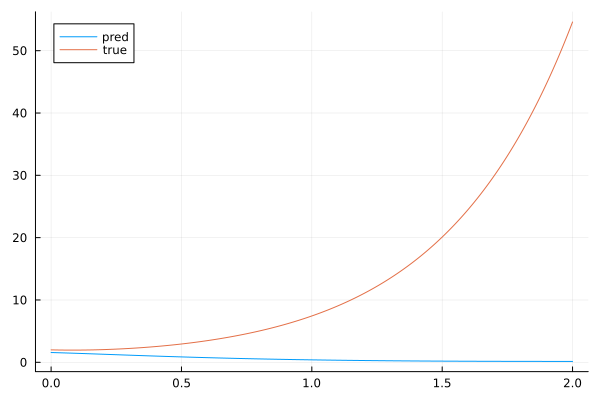

In [15]:
xs = reshape(range(0, 2, length=1000), 1, :)
u_pred = pinn.phi(xs, res.u)
u_true = @. exp(2xs)+exp(-3xs)

using Plots
plot(vec(xs),vec(u_pred), label="pred")
plot!(vec(xs),vec(u_true), label="true")